## **KMeans Algorithm for music clustering**

In [160]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

#### **Import and Prepare Data**

In [2]:
music_data = pd.read_csv('df_audio_features_5000.csv')
music_data

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html
0,Se Eu Quiser Falar Com Deus ...,Gilberto Gil,0.6580,0.25900,11,-13.141,0,0.0705,0.694,0.000059,0.9750,0.3060,110.376,,256213,4,1n7JnwviZ7zf0LR1tcGFq7,https://open.spotify.com/track/1n7JnwviZ7zf0LR...
1,Saudade De Bahia ...,Antônio Carlos Jobim,0.7420,0.39900,2,-12.646,1,0.0346,0.217,0.000002,0.1070,0.6930,125.039,,191867,4,5QGM1U0eCYrQuwSJwTm5Zq,https://open.spotify.com/track/5QGM1U0eCYrQuwS...
2,"Canta Canta, Minha Gente ...",Martinho Da Vila,0.8510,0.73000,2,-11.048,1,0.3470,0.453,0.000063,0.1240,0.9050,93.698,,152267,4,0NLIFSZxPzQhCwnkn5PJYs,https://open.spotify.com/track/0NLIFSZxPzQhCwn...
3,Mulher Eu Sei ...,Chico César,0.7050,0.05020,4,-18.115,1,0.0471,0.879,0.000041,0.3860,0.5240,106.802,,186227,4,3mXqOdlLE1k67WsAxryPFs,https://open.spotify.com/track/3mXqOdlLE1k67Ws...
4,Rosa Morena ...,Kurt Elling,0.6510,0.11900,6,-19.807,1,0.0380,0.916,0.000343,0.1040,0.4020,120.941,,273680,4,7bSzjzjTkWT2CkIPPdp0eA,https://open.spotify.com/track/7bSzjzjTkWT2CkI...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5230,"1812 Festival Overture, Op. 49: 1812 Overture,...",Pyotr Ilyich Tchaikovsky,0.2020,0.06940,3,-23.390,1,0.0473,0.917,0.715000,0.0832,0.0655,87.906,,995000,4,1aEhYlZtypmipA06SDJ4U3,https://open.spotify.com/track/1aEhYlZtypmipA0...
5231,"Winter Fragments pour ensemble instrumental, s...",Tristan Murail,0.1880,0.10100,6,-21.873,1,0.0442,0.855,0.426000,0.0694,0.0355,83.134,,855000,4,1Gfqe7TAKklmuZf6hxsH6h,https://open.spotify.com/track/1Gfqe7TAKklmuZf...
5232,"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3...",Arnold Schoenberg,0.0596,0.00093,9,-42.959,1,0.0434,0.951,0.969000,0.0772,0.0344,71.573,,238187,3,2XNwnFrdMDpismp0VUZ7cU,https://open.spotify.com/track/2XNwnFrdMDpismp...
5233,"Serenade For Strings In E, Op.22, B. 52: 1. Mo...",Antonín Dvořák,0.1330,0.02080,4,-29.443,1,0.0419,0.883,0.505000,0.1110,0.0591,67.109,,314307,4,7ucDwgMtE3YJtEfTbuRhy0,https://open.spotify.com/track/7ucDwgMtE3YJtEf...


In [3]:
music_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5235 entries, 0 to 5234
Data columns (total 18 columns):
 #   Column                                                                                                                                                                             Non-Null Count  Dtype  
---  ------                                                                                                                                                                             --------------  -----  
 0   name                                                                                                                                                                               5235 non-null   object 
 1   artist                                                                                                                                                                             5235 non-null   object 
 2   danceability                                            

In [4]:
music_data.columns = list(pd.DataFrame(music_data.columns)[0].str.strip(" "))
music_data

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html
0,Se Eu Quiser Falar Com Deus ...,Gilberto Gil,0.6580,0.25900,11,-13.141,0,0.0705,0.694,0.000059,0.9750,0.3060,110.376,,256213,4,1n7JnwviZ7zf0LR1tcGFq7,https://open.spotify.com/track/1n7JnwviZ7zf0LR...
1,Saudade De Bahia ...,Antônio Carlos Jobim,0.7420,0.39900,2,-12.646,1,0.0346,0.217,0.000002,0.1070,0.6930,125.039,,191867,4,5QGM1U0eCYrQuwSJwTm5Zq,https://open.spotify.com/track/5QGM1U0eCYrQuwS...
2,"Canta Canta, Minha Gente ...",Martinho Da Vila,0.8510,0.73000,2,-11.048,1,0.3470,0.453,0.000063,0.1240,0.9050,93.698,,152267,4,0NLIFSZxPzQhCwnkn5PJYs,https://open.spotify.com/track/0NLIFSZxPzQhCwn...
3,Mulher Eu Sei ...,Chico César,0.7050,0.05020,4,-18.115,1,0.0471,0.879,0.000041,0.3860,0.5240,106.802,,186227,4,3mXqOdlLE1k67WsAxryPFs,https://open.spotify.com/track/3mXqOdlLE1k67Ws...
4,Rosa Morena ...,Kurt Elling,0.6510,0.11900,6,-19.807,1,0.0380,0.916,0.000343,0.1040,0.4020,120.941,,273680,4,7bSzjzjTkWT2CkIPPdp0eA,https://open.spotify.com/track/7bSzjzjTkWT2CkI...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5230,"1812 Festival Overture, Op. 49: 1812 Overture,...",Pyotr Ilyich Tchaikovsky,0.2020,0.06940,3,-23.390,1,0.0473,0.917,0.715000,0.0832,0.0655,87.906,,995000,4,1aEhYlZtypmipA06SDJ4U3,https://open.spotify.com/track/1aEhYlZtypmipA0...
5231,"Winter Fragments pour ensemble instrumental, s...",Tristan Murail,0.1880,0.10100,6,-21.873,1,0.0442,0.855,0.426000,0.0694,0.0355,83.134,,855000,4,1Gfqe7TAKklmuZf6hxsH6h,https://open.spotify.com/track/1Gfqe7TAKklmuZf...
5232,"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3...",Arnold Schoenberg,0.0596,0.00093,9,-42.959,1,0.0434,0.951,0.969000,0.0772,0.0344,71.573,,238187,3,2XNwnFrdMDpismp0VUZ7cU,https://open.spotify.com/track/2XNwnFrdMDpismp...
5233,"Serenade For Strings In E, Op.22, B. 52: 1. Mo...",Antonín Dvořák,0.1330,0.02080,4,-29.443,1,0.0419,0.883,0.505000,0.1110,0.0591,67.109,,314307,4,7ucDwgMtE3YJtEfTbuRhy0,https://open.spotify.com/track/7ucDwgMtE3YJtEf...


In [5]:
music_data = music_data.drop(['type', 'key', 'html', 'id', 'artist'], axis=1)
music_data

,name,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Se Eu Quiser Falar Com Deus ...,0.6580,0.25900,-13.141,0,0.0705,0.694,0.000059,0.9750,0.3060,110.376,256213,4
1,Saudade De Bahia ...,0.7420,0.39900,-12.646,1,0.0346,0.217,0.000002,0.1070,0.6930,125.039,191867,4
2,"Canta Canta, Minha Gente ...",0.8510,0.73000,-11.048,1,0.3470,0.453,0.000063,0.1240,0.9050,93.698,152267,4
3,Mulher Eu Sei ...,0.7050,0.05020,-18.115,1,0.0471,0.879,0.000041,0.3860,0.5240,106.802,186227,4
4,Rosa Morena ...,0.6510,0.11900,-19.807,1,0.0380,0.916,0.000343,0.1040,0.4020,120.941,273680,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5230,"1812 Festival Overture, Op. 49: 1812 Overture,...",0.2020,0.06940,-23.390,1,0.0473,0.917,0.715000,0.0832,0.0655,87.906,995000,4
5231,"Winter Fragments pour ensemble instrumental, s...",0.1880,0.10100,-21.873,1,0.0442,0.855,0.426000,0.0694,0.0355,83.134,855000,4
5232,"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3...",0.0596,0.00093,-42.959,1,0.0434,0.951,0.969000,0.0772,0.0344,71.573,238187,3
5233,"Serenade For Strings In E, Op.22, B. 52: 1. Mo...",0.1330,0.02080,-29.443,1,0.0419,0.883,0.505000,0.1110,0.0591,67.109,314307,4


In [6]:
music_data.time_signature.value_counts()

4    4692
3     419
5      71
1      52
0       1
Name: time_signature, dtype: int64

In [7]:
music_data.isnull().sum()

name                0
danceability        0
energy              0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
dtype: int64

In [8]:
music_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5235 entries, 0 to 5234
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              5235 non-null   object 
 1   danceability      5235 non-null   float64
 2   energy            5235 non-null   float64
 3   loudness          5235 non-null   float64
 4   mode              5235 non-null   int64  
 5   speechiness       5235 non-null   float64
 6   acousticness      5235 non-null   float64
 7   instrumentalness  5235 non-null   float64
 8   liveness          5235 non-null   float64
 9   valence           5235 non-null   float64
 10  tempo             5235 non-null   float64
 11  duration_ms       5235 non-null   int64  
 12  time_signature    5235 non-null   int64  
dtypes: float64(9), int64(3), object(1)
memory usage: 531.8+ KB


In [9]:
music_data.describe()

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5.235000e+03,5235.000000
mean,0.509503,0.653565,-9.338098,0.646227,0.083178,0.290043,0.257337,0.185354,0.443596,118.721407,2.479112e+05,3.902961
std,0.218041,0.288335,6.294850,0.478185,0.071193,0.355985,0.370686,0.149410,0.277725,28.568463,1.356330e+05,0.420324
min,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.276000e+04,0.000000
25%,0.309000,0.479000,-11.337000,0.000000,0.039000,0.002450,0.000001,0.092500,0.196000,96.174000,1.899910e+05,4.000000
50%,0.539000,0.738000,-7.338000,1.000000,0.055800,0.095400,0.001880,0.125000,0.417000,119.180000,2.246670e+05,4.000000
75%,0.688000,0.893000,-5.264000,1.000000,0.098650,0.565500,0.643000,0.237000,0.677000,134.019000,2.717200e+05,4.000000
max,0.967000,1.000000,1.342000,1.000000,0.918000,0.996000,0.985000,0.987000,0.985000,213.990000,3.815787e+06,5.000000


In [10]:
music_data['loudness'] = (music_data['loudness']/-60)
music_data

,name,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Se Eu Quiser Falar Com Deus ...,0.6580,0.25900,0.219017,0,0.0705,0.694,0.000059,0.9750,0.3060,110.376,256213,4
1,Saudade De Bahia ...,0.7420,0.39900,0.210767,1,0.0346,0.217,0.000002,0.1070,0.6930,125.039,191867,4
2,"Canta Canta, Minha Gente ...",0.8510,0.73000,0.184133,1,0.3470,0.453,0.000063,0.1240,0.9050,93.698,152267,4
3,Mulher Eu Sei ...,0.7050,0.05020,0.301917,1,0.0471,0.879,0.000041,0.3860,0.5240,106.802,186227,4
4,Rosa Morena ...,0.6510,0.11900,0.330117,1,0.0380,0.916,0.000343,0.1040,0.4020,120.941,273680,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5230,"1812 Festival Overture, Op. 49: 1812 Overture,...",0.2020,0.06940,0.389833,1,0.0473,0.917,0.715000,0.0832,0.0655,87.906,995000,4
5231,"Winter Fragments pour ensemble instrumental, s...",0.1880,0.10100,0.364550,1,0.0442,0.855,0.426000,0.0694,0.0355,83.134,855000,4
5232,"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3...",0.0596,0.00093,0.715983,1,0.0434,0.951,0.969000,0.0772,0.0344,71.573,238187,3
5233,"Serenade For Strings In E, Op.22, B. 52: 1. Mo...",0.1330,0.02080,0.490717,1,0.0419,0.883,0.505000,0.1110,0.0591,67.109,314307,4


In [11]:
idx = list(pd.DataFrame(music_data['name'])['name'].str.strip(" "))
idx

['Se Eu Quiser Falar Com Deus',
 'Saudade De Bahia',
 'Canta Canta, Minha Gente',
 'Mulher Eu Sei',
 'Rosa Morena',
 'Desafinado',
 'Madalena',
 'O Meu Amor É Glòria',
 'Brigas Nunca Mais',
 'Previsao',
 'The Girl From Ipanema',
 'Blue Bossa - Remastered',
 'Aqua De Coco',
 'Samba de Verão',
 'Mas Que Nada',
 'Nova Bossa Nova',
 'Não Sei',
 'A Força Que Nunca Seca (feat. Maria Bethânia)',
 'Aquarela Do Brasil',
 'Brigas Nunca Mais',
 'Águas De Março',
 'Aquarela Do Brasil',
 'Chega De Saudade',
 "Don't Stop the Carnival",
 'Rebel Rebel',
 'Rosa Morena - Live At Carnegie Hall/1964',
 'Karoliina Kaunis',
 'Brigas, Nunca Mais',
 'Aquarela Do Brasil',
 'Kaipuusamba',
 'Batida Diferente',
 'Team Zissou',
 'Parabens',
 'O Amor Em Paz',
 'Once Again',
 'Mariana',
 'Mariana',
 'Carnaval Inesquecível Na Cidade Alta',
 'Garota De Ipanema',
 'Corcovado - Remastered',
 'O Pato (The Duck) - Live At Carnegie Hall/1964',
 'August Day Song',
 'Os Grilos',
 'Saudade Fez Um Samba',
 'OBI',
 'Mas Que Nad

In [12]:
music_data = music_data.drop(['name'], axis=1)
music_data.index = idx
music_data

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
Se Eu Quiser Falar Com Deus,0.6580,0.25900,0.219017,0,0.0705,0.694,0.000059,0.9750,0.3060,110.376,256213,4
Saudade De Bahia,0.7420,0.39900,0.210767,1,0.0346,0.217,0.000002,0.1070,0.6930,125.039,191867,4
"Canta Canta, Minha Gente",0.8510,0.73000,0.184133,1,0.3470,0.453,0.000063,0.1240,0.9050,93.698,152267,4
Mulher Eu Sei,0.7050,0.05020,0.301917,1,0.0471,0.879,0.000041,0.3860,0.5240,106.802,186227,4
Rosa Morena,0.6510,0.11900,0.330117,1,0.0380,0.916,0.000343,0.1040,0.4020,120.941,273680,4
...,...,...,...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",0.2020,0.06940,0.389833,1,0.0473,0.917,0.715000,0.0832,0.0655,87.906,995000,4
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",0.1880,0.10100,0.364550,1,0.0442,0.855,0.426000,0.0694,0.0355,83.134,855000,4
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",0.0596,0.00093,0.715983,1,0.0434,0.951,0.969000,0.0772,0.0344,71.573,238187,3
"Serenade For Strings In E, Op.22, B. 52: 1. Moderato",0.1330,0.02080,0.490717,1,0.0419,0.883,0.505000,0.1110,0.0591,67.109,314307,4


In [13]:
music_data.describe()

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5.235000e+03,5235.000000
mean,0.509503,0.653565,0.155635,0.646227,0.083178,0.290043,0.257337,0.185354,0.443596,118.721407,2.479112e+05,3.902961
std,0.218041,0.288335,0.104914,0.478185,0.071193,0.355985,0.370686,0.149410,0.277725,28.568463,1.356330e+05,0.420324
min,0.000000,0.000000,-0.022367,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.276000e+04,0.000000
25%,0.309000,0.479000,0.087733,0.000000,0.039000,0.002450,0.000001,0.092500,0.196000,96.174000,1.899910e+05,4.000000
50%,0.539000,0.738000,0.122300,1.000000,0.055800,0.095400,0.001880,0.125000,0.417000,119.180000,2.246670e+05,4.000000
75%,0.688000,0.893000,0.188950,1.000000,0.098650,0.565500,0.643000,0.237000,0.677000,134.019000,2.717200e+05,4.000000
max,0.967000,1.000000,1.000000,1.000000,0.918000,0.996000,0.985000,0.987000,0.985000,213.990000,3.815787e+06,5.000000


#### **Scale the Data**

In [14]:
music_data_all = pd.DataFrame(RobustScaler(with_centering=False).fit_transform(music_data.drop(['mode', 'time_signature'], axis=1)))
music_data_all.columns = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
music_data_all.index = list(music_data.index)
music_data_all

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
Se Eu Quiser Falar Com Deus,1.736148,0.625604,2.163840,1.181894,1.232573,0.000091,6.747405,0.636175,2.916528,3.134909
Saudade De Bahia,1.957784,0.963768,2.082332,0.580050,0.385401,0.000003,0.740484,1.440748,3.303977,2.347600
"Canta Canta, Minha Gente",2.245383,1.763285,1.819200,5.817267,0.804547,0.000099,0.858131,1.881497,2.475836,1.863072
Mulher Eu Sei,1.860158,0.121256,2.982875,0.789606,1.561140,0.000063,2.671280,1.089397,2.822090,2.278591
Rosa Morena,1.717678,0.287440,3.261485,0.637049,1.626854,0.000533,0.719723,0.835759,3.195693,3.348628
...,...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",0.532982,0.167633,3.851474,0.792959,1.628630,1.111977,0.575779,0.136175,2.322790,12.174381
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",0.496042,0.243961,3.601680,0.740989,1.518515,0.662520,0.480277,0.073805,2.196697,10.461403
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",0.157256,0.002246,7.073769,0.727578,1.689015,1.507001,0.534256,0.071518,1.891214,2.914351
"Serenade For Strings In E, Op.22, B. 52: 1. Moderato",0.350923,0.050242,4.848180,0.702431,1.568244,0.785382,0.768166,0.122869,1.773259,3.845722


In [15]:
music_data_all.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000
mean,1.344335,1.578659,1.537642,1.394438,0.515129,0.400213,1.282723,0.922238,3.137043,3.033332
std,0.575306,0.696461,1.036531,1.193515,0.632244,0.576496,1.033978,0.577391,0.754881,1.659546
min,0.000000,0.000000,-0.220978,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400837
25%,0.815303,1.157005,0.866787,0.653814,0.004351,0.000002,0.640138,0.407484,2.541260,2.324646
50%,1.422164,1.782609,1.208299,0.935457,0.169434,0.002924,0.865052,0.866944,3.149161,2.748926
75%,1.815303,2.157005,1.866787,1.653814,1.004351,1.000002,1.640138,1.407484,3.541260,3.324646
max,2.551451,2.415459,9.879796,15.389774,1.768937,1.531884,6.830450,2.047817,5.654380,46.688287


#### **Apply KMeans Algorithm**

In [16]:
inertia_list1 = []
sil_scores1 = []

for i in range(20, 100):
    kmns = KMeans(n_clusters=i, n_init=35, random_state=60).fit(music_data_all)
    inertia_list1.append(round(kmns.inertia_))
    sil_scores1.append(silhouette_score(music_data_all, kmns.labels_))

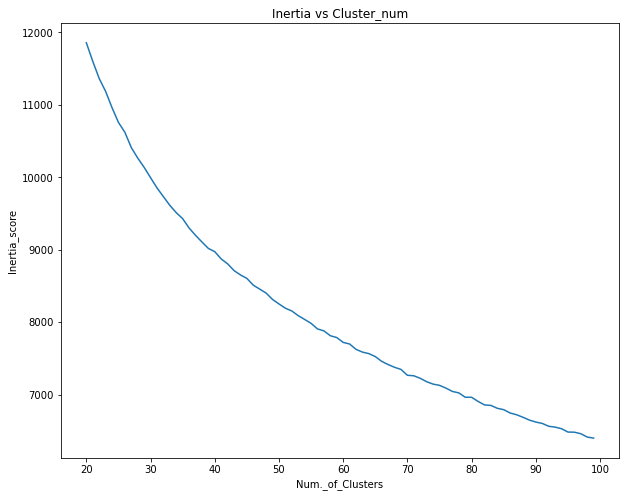

In [17]:
plt.figure(figsize=(10, 8))
plt.plot(range(20, 100), inertia_list1)
plt.title('Inertia vs Cluster_num')
plt.xlabel('Num._of_Clusters')
plt.ylabel('Inertia_score')
plt.show();

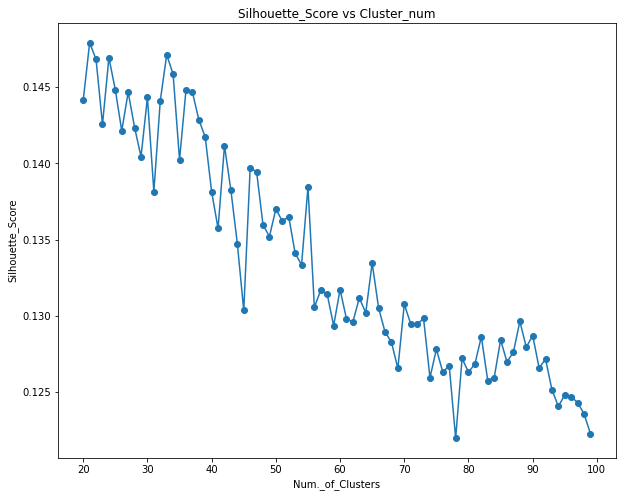

In [18]:
plt.figure(figsize=(10, 8))
plt.plot(range(20, 100), sil_scores1, marker='o')
plt.title('Silhouette_Score vs Cluster_num')
plt.xlabel('Num._of_Clusters')
plt.ylabel('Silhouette_Score')
plt.show();

In [19]:
sil_scores1[13]

0.1471333833034348

In [20]:
result = pd.DataFrame({'Cluster_num': range(20, 100), 'Sil_Score': sil_scores1})
result.head(45)

,Cluster_num,Sil_Score
0,20,0.144136
1,21,0.147919
2,22,0.146828
3,23,0.142554
4,24,0.146940
5,25,0.144826
6,26,0.142133
7,27,0.144670
8,28,0.142356
9,29,0.140442


In [21]:
result.iloc[13,]

Cluster_num    33.000000
Sil_Score       0.147133
Name: 13, dtype: float64

In [22]:
kmns = KMeans(n_clusters=33, n_init=35, random_state=60).fit(music_data_all)

In [23]:
music_data_all['cluster'] = kmns.labels_
music_data_all

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster
Se Eu Quiser Falar Com Deus,1.736148,0.625604,2.163840,1.181894,1.232573,0.000091,6.747405,0.636175,2.916528,3.134909,12
Saudade De Bahia,1.957784,0.963768,2.082332,0.580050,0.385401,0.000003,0.740484,1.440748,3.303977,2.347600,4
"Canta Canta, Minha Gente",2.245383,1.763285,1.819200,5.817267,0.804547,0.000099,0.858131,1.881497,2.475836,1.863072,16
Mulher Eu Sei,1.860158,0.121256,2.982875,0.789606,1.561140,0.000063,2.671280,1.089397,2.822090,2.278591,11
Rosa Morena,1.717678,0.287440,3.261485,0.637049,1.626854,0.000533,0.719723,0.835759,3.195693,3.348628,11
...,...,...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",0.532982,0.167633,3.851474,0.792959,1.628630,1.111977,0.575779,0.136175,2.322790,12.174381,9
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",0.496042,0.243961,3.601680,0.740989,1.518515,0.662520,0.480277,0.073805,2.196697,10.461403,9
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",0.157256,0.002246,7.073769,0.727578,1.689015,1.507001,0.534256,0.071518,1.891214,2.914351,15
"Serenade For Strings In E, Op.22, B. 52: 1. Moderato",0.350923,0.050242,4.848180,0.702431,1.568244,0.785382,0.768166,0.122869,1.773259,3.845722,15


#### **Inspect the Clusters**

In [24]:
music_data_all[music_data_all['cluster'] == 0]

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster
Mirall,0.683377,1.681159,1.005599,0.536463,0.020247,0.247279,1.024221,1.072765,2.039530,1.777741,0
Afternoon,1.612137,2.248792,1.625720,1.961442,0.230885,1.360811,1.799308,0.719335,2.983855,2.190006,0
Let's Get Out Of This Country,0.712401,2.004831,0.756134,1.242246,0.016979,0.674962,0.982699,0.426195,3.099855,2.405021,0
There She Goes,0.994723,2.381643,-0.189033,0.932104,0.214901,0.853812,1.321799,0.511435,2.641829,2.138164,0
Alright,1.018470,2.403382,-0.129755,1.463537,0.577213,1.376363,1.577855,0.137006,2.665293,1.856220,0
...,...,...,...,...,...,...,...,...,...,...,...
The Red Passage,0.791557,2.408213,0.778857,2.682313,0.000567,0.581649,1.896194,0.201871,3.226054,1.781008,0
Two of Me - remastered 2003,0.783641,2.111111,1.117734,1.567477,0.000373,0.211509,0.844291,0.338877,2.450284,1.942517,0
...And Here I Die... Satisfied - remastered 2003,0.596306,2.219807,0.981393,1.517184,0.000007,0.037014,0.795848,0.507277,2.202933,2.698516,0
Stench of Prophet,0.511873,2.328502,2.324881,1.103101,0.000003,1.465010,0.516955,0.130977,3.523794,1.008210,0


In [25]:
music_data_all[music_data_all['cluster'] == 1]

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster
Your Fucking Sunny Day,1.000000,1.188406,1.226906,0.444258,0.129829,0.912910,2.394464,0.461538,2.761792,3.061337,1
Unfucktheworld,1.464380,1.731884,1.681541,1.133277,1.291182,1.077762,1.930796,0.144906,3.361818,2.485764,1
Absolutely Cuckoo,0.920844,2.164251,1.743784,1.777033,0.002557,1.135305,1.986159,1.000000,3.744748,2.840277,1
"Archie, Marry Me",0.701847,2.043478,0.895768,0.621961,0.000213,1.429240,2.560554,1.590437,4.066561,3.383377,1
Tornar a estar bé,1.176781,2.149758,1.313025,0.516345,0.479531,1.027995,3.121107,1.006237,4.492060,3.178370,1
...,...,...,...,...,...,...,...,...,...,...,...
To Lead Astray,0.720317,2.345411,1.142434,2.363789,0.001400,0.687404,2.795848,0.299376,2.674699,2.673555,1
Epoch of Barbarity,1.065963,2.113527,1.789066,1.978206,0.000181,1.461900,1.723183,0.463617,2.942238,2.716294,1
Four Walls,0.720317,2.113527,1.711016,1.282481,0.000040,1.494559,2.491349,0.478170,3.350192,3.623524,1
And Jesus Wept,0.725594,2.335749,1.005599,1.369656,0.000520,1.132195,2.442907,0.276507,2.746862,4.444285,1


In [26]:
music_data_all[music_data_all['cluster'] == 2]

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster
Parabens,1.944591,1.937198,1.328668,0.710813,0.025930,0.538103,0.620761,0.989605,2.901863,6.310942,2
O Amor Em Paz,1.799472,0.678744,2.064383,0.571668,1.728088,1.374808,0.795848,0.906445,3.120809,5.739970,2
Blue Bossa,1.580475,1.251208,2.212086,0.927075,1.461682,1.353035,1.384083,2.000000,2.925697,5.429982,2
Chorinho Pra Voce,1.725594,0.966184,2.190351,0.678961,1.392416,1.242615,0.689965,1.767152,2.812815,5.573383,2
Manada,1.717678,1.171498,1.891981,0.670578,0.206021,1.083983,0.604152,1.530146,2.876496,5.161130,2
...,...,...,...,...,...,...,...,...,...,...,...
The Victory Song - Live,1.899736,1.388889,1.909765,1.255658,0.003694,0.000004,0.611073,1.264033,3.435170,5.902764,2
I'm Getting Ready,1.150396,1.536232,0.834019,0.660520,0.016233,0.000000,0.948097,0.565489,2.473088,6.193640,2
Holy Water - Church Sessions,1.372032,1.246377,1.198584,0.722548,1.237901,0.000000,1.162630,0.600832,1.954525,5.687210,2
"Symphony No. 3 in A Minor, Op. 56, MWV N 18 ""Scottish"": 4. Allegro vivacissimo - Allegro maestoso assai",0.860158,0.685990,2.162193,0.642079,1.601989,1.433906,0.871972,0.442827,3.190170,7.055672,2


In [27]:
music_data_all[music_data_all['cluster'] == 3]

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster
"3 Gymnopédies: No. 1, Lent et douloureux",1.234828,0.004420,5.397003,0.979044,1.767161,1.479007,0.589619,0.301455,2.002695,2.579256,3
III. Andante,1.189974,0.064976,4.330150,0.714166,1.736968,1.283050,0.816609,0.661123,3.141208,2.590353,3
"6 Chorale Preludes, BV B 50: Herzlich tut mich verlangen, Op. 122/10",0.319261,0.011787,6.517372,0.672255,1.767161,1.437016,0.480277,0.386694,2.220135,2.215126,3
"Prelude in B minor, BWV 855a (Arr. by Alexander Siloti)",0.480211,0.091063,5.557056,0.655490,1.752953,1.488338,0.556401,0.191892,2.655093,2.958607,3
Comptine d'un autre été: L'après-midi,0.952507,0.149758,4.594928,0.735960,1.752953,1.447903,0.705882,0.754678,2.898190,1.549352,3
...,...,...,...,...,...,...,...,...,...,...,...
unother,0.646438,0.208213,4.989956,0.707460,1.765385,1.219287,0.636678,0.081081,1.846875,0.767879,3
Poa Alpina,0.577836,0.073430,5.796147,0.628667,1.614421,1.458789,1.031142,0.237006,3.441511,3.071945,3
Wisdom Eye,0.926121,0.054348,5.006587,0.709137,1.742296,1.287716,0.567474,0.206653,2.137667,2.325576,3
Olancha Farewell,0.517150,0.016594,5.640540,0.740989,1.761833,1.426130,0.733564,0.110187,1.905800,1.693732,3


In [147]:
music_data_all

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster
Se Eu Quiser Falar Com Deus,1.736148,0.625604,2.163840,1.181894,1.232573,0.000091,6.747405,0.636175,2.916528,3.134909,12
Saudade De Bahia,1.957784,0.963768,2.082332,0.580050,0.385401,0.000003,0.740484,1.440748,3.303977,2.347600,4
"Canta Canta, Minha Gente",2.245383,1.763285,1.819200,5.817267,0.804547,0.000099,0.858131,1.881497,2.475836,1.863072,16
Mulher Eu Sei,1.860158,0.121256,2.982875,0.789606,1.561140,0.000063,2.671280,1.089397,2.822090,2.278591,11
Rosa Morena,1.717678,0.287440,3.261485,0.637049,1.626854,0.000533,0.719723,0.835759,3.195693,3.348628,11
...,...,...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",0.532982,0.167633,3.851474,0.792959,1.628630,1.111977,0.575779,0.136175,2.322790,12.174381,9
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",0.496042,0.243961,3.601680,0.740989,1.518515,0.662520,0.480277,0.073805,2.196697,10.461403,9
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",0.157256,0.002246,7.073769,0.727578,1.689015,1.507001,0.534256,0.071518,1.891214,2.914351,15
"Serenade For Strings In E, Op.22, B. 52: 1. Moderato",0.350923,0.050242,4.848180,0.702431,1.568244,0.785382,0.768166,0.122869,1.773259,3.845722,15


#### **Visualize the Clustering**

#### **Drop some other columns to test the effects**

In [29]:
music_data_all_extra = music_data_all.drop(['duration_ms', 'cluster'], axis=1)
music_data_all_extra

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
Se Eu Quiser Falar Com Deus,1.736148,0.625604,2.163840,1.181894,1.232573,0.000091,6.747405,0.636175,2.916528
Saudade De Bahia,1.957784,0.963768,2.082332,0.580050,0.385401,0.000003,0.740484,1.440748,3.303977
"Canta Canta, Minha Gente",2.245383,1.763285,1.819200,5.817267,0.804547,0.000099,0.858131,1.881497,2.475836
Mulher Eu Sei,1.860158,0.121256,2.982875,0.789606,1.561140,0.000063,2.671280,1.089397,2.822090
Rosa Morena,1.717678,0.287440,3.261485,0.637049,1.626854,0.000533,0.719723,0.835759,3.195693
...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",0.532982,0.167633,3.851474,0.792959,1.628630,1.111977,0.575779,0.136175,2.322790
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",0.496042,0.243961,3.601680,0.740989,1.518515,0.662520,0.480277,0.073805,2.196697
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",0.157256,0.002246,7.073769,0.727578,1.689015,1.507001,0.534256,0.071518,1.891214
"Serenade For Strings In E, Op.22, B. 52: 1. Moderato",0.350923,0.050242,4.848180,0.702431,1.568244,0.785382,0.768166,0.122869,1.773259


In [30]:
inertia_list2 = []
sil_scores2 = []

for i in range(20, 100):
    kmns = KMeans(n_clusters=i, n_init=35, random_state=60).fit(music_data_all_extra)
    inertia_list2.append(round(kmns.inertia_))
    sil_scores2.append(silhouette_score(music_data_all_extra, kmns.labels_))

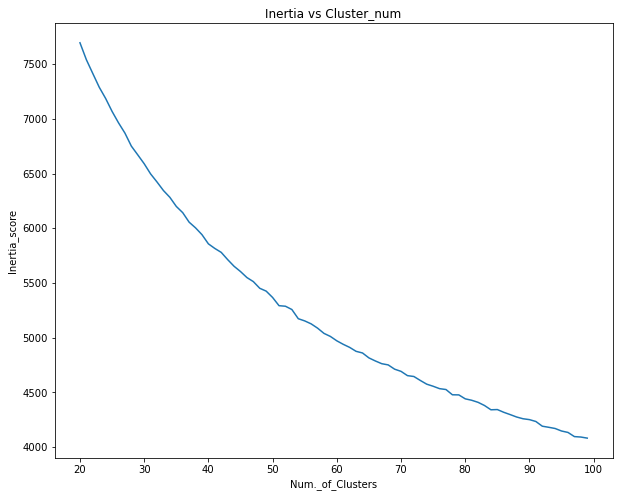

In [31]:
plt.figure(figsize=(10, 8))
plt.plot(range(20, 100), inertia_list2)
plt.title('Inertia vs Cluster_num')
plt.xlabel('Num._of_Clusters')
plt.ylabel('Inertia_score')
plt.show();

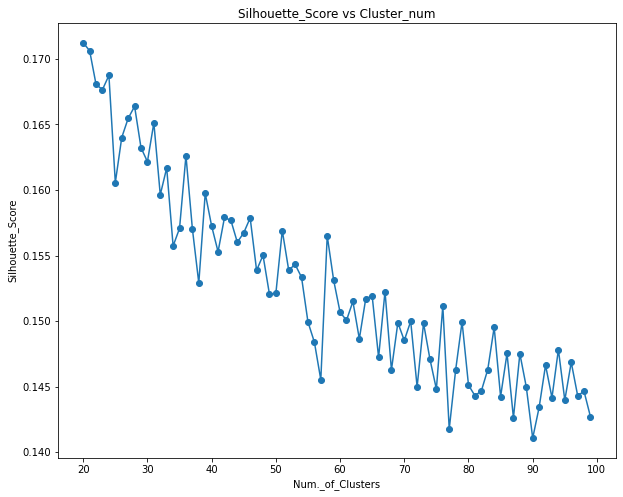

In [32]:
plt.figure(figsize=(10, 8))
plt.plot(range(20, 100), sil_scores2, marker='o')
plt.title('Silhouette_Score vs Cluster_num')
plt.xlabel('Num._of_Clusters')
plt.ylabel('Silhouette_Score')
plt.show();

    A higher silhouette score is obtained.

In [33]:
sil_scores2[11]

0.16511528163123837

In [34]:
result1 = pd.DataFrame({'Cluster_num': range(20, 100), 'Sil_Scores': sil_scores2})
result1.head(45)

,Cluster_num,Sil_Scores
0,20,0.171227
1,21,0.170620
2,22,0.168048
3,23,0.167656
4,24,0.168741
5,25,0.160566
6,26,0.164003
7,27,0.165463
8,28,0.166379
9,29,0.163225


In [35]:
kmns = KMeans(n_clusters=31, n_init=35, random_state=60).fit(music_data_all_extra)

In [36]:
music_data_all_extra['cluster'] = kmns.labels_
music_data_all_extra

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
Se Eu Quiser Falar Com Deus,1.736148,0.625604,2.163840,1.181894,1.232573,0.000091,6.747405,0.636175,2.916528,7
Saudade De Bahia,1.957784,0.963768,2.082332,0.580050,0.385401,0.000003,0.740484,1.440748,3.303977,15
"Canta Canta, Minha Gente",2.245383,1.763285,1.819200,5.817267,0.804547,0.000099,0.858131,1.881497,2.475836,6
Mulher Eu Sei,1.860158,0.121256,2.982875,0.789606,1.561140,0.000063,2.671280,1.089397,2.822090,4
Rosa Morena,1.717678,0.287440,3.261485,0.637049,1.626854,0.000533,0.719723,0.835759,3.195693,17
...,...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",0.532982,0.167633,3.851474,0.792959,1.628630,1.111977,0.575779,0.136175,2.322790,28
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",0.496042,0.243961,3.601680,0.740989,1.518515,0.662520,0.480277,0.073805,2.196697,28
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",0.157256,0.002246,7.073769,0.727578,1.689015,1.507001,0.534256,0.071518,1.891214,0
"Serenade For Strings In E, Op.22, B. 52: 1. Moderato",0.350923,0.050242,4.848180,0.702431,1.568244,0.785382,0.768166,0.122869,1.773259,0


#### **Inspect some Clusters**

In [37]:
music_data_all_extra[music_data_all_extra['cluster'] == 3]

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
La Nueva Reconquista de Graná,0.604222,1.545894,1.212086,0.786253,0.733505,1.174185,0.641522,1.135135,4.405655,3
Red Eyes,1.105541,2.125604,0.991108,0.504610,0.052393,1.362366,0.934256,1.083160,3.984463,3
Stinkfist,0.754617,1.758454,1.088095,1.032691,0.000309,1.300158,0.920415,0.970894,4.530083,3
Rock It,1.269129,2.335749,0.314013,1.217100,0.002433,0.594091,0.553633,0.247401,4.598494,3
Terrorist - P.A. Mix,1.646438,1.816425,1.090565,1.116513,0.004138,1.395026,1.204152,0.787942,4.353283,3
...,...,...,...,...,...,...,...,...,...,...
Warriors Trial,0.437995,2.294686,0.805862,1.357921,0.000021,1.306378,0.557785,0.224532,3.914863,3
Second Thought,0.556728,2.272947,1.385477,1.180218,0.000177,0.041680,1.217993,0.532225,4.447932,3
Infection Of Death,0.633245,2.014493,1.652067,1.451802,0.001352,1.385694,0.913495,0.571726,4.723055,3
Mutant Christ,0.472296,2.304348,2.408200,0.901928,0.000199,1.353035,1.280277,0.330561,4.124719,3


In [38]:
music_data_all_extra[music_data_all_extra['cluster'] == 0]

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
Shake It Off,0.000000,0.000000,9.879796,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
I. Adagio sostenuto,0.372032,0.002971,7.220649,0.719195,1.765385,1.465010,0.761246,0.175260,2.065134,0
"3 Gymnopédies: No. 1, Lent et douloureux",1.234828,0.004420,5.397003,0.979044,1.767161,1.479007,0.589619,0.301455,2.002695,0
"6 Chorale Preludes, BV B 50: Herzlich tut mich verlangen, Op. 122/10",0.319261,0.011787,6.517372,0.672255,1.767161,1.437016,0.480277,0.386694,2.220135,0
"Prelude in B minor, BWV 855a (Arr. by Alexander Siloti)",0.480211,0.091063,5.557056,0.655490,1.752953,1.488338,0.556401,0.191892,2.655093,0
...,...,...,...,...,...,...,...,...,...,...
"Six Pieces For Orchestra, Op.6 - Original Version (1909): 1. Etwas bewegt",0.464380,0.025121,5.186728,0.652137,1.543380,0.047434,0.485813,0.128067,2.214295,0
The Unanswered Question,0.335092,0.002609,6.962457,0.657167,1.173963,0.276828,0.865052,0.080249,2.065663,0
"Pines Of Rome, P. 141: 3. The Pines Of The Janiculum",0.313984,0.081643,5.098798,0.710813,1.665927,1.328151,0.557785,0.073597,2.524825,0
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",0.157256,0.002246,7.073769,0.727578,1.689015,1.507001,0.534256,0.071518,1.891214,0


In [39]:
music_data_all_extra[music_data_all_extra['cluster'] == 1]

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
Seja Agora,1.754617,1.891304,0.995554,1.391450,1.477666,0.000000,0.596540,1.727651,2.594240,1
Tirei o Chapéu,1.912929,2.239130,1.207970,1.332775,0.000966,0.000000,0.298962,1.711019,3.568820,1
Mina Do Condomínio,1.783641,2.096618,0.710193,0.539816,1.054968,0.000000,0.669204,2.008316,2.536346,1
There Is An End,1.823219,1.386473,0.988968,0.454317,0.209573,0.000109,0.961938,1.775468,2.828537,1
Devil Or Angel,1.728232,2.028986,0.692244,0.789606,0.020602,0.008429,0.975779,1.309771,2.878584,1
...,...,...,...,...,...,...,...,...,...,...
Booty,2.176781,1.862319,0.677754,1.349539,0.029660,0.000003,0.623529,1.490644,2.719725,1
Hope,2.290237,1.838164,0.711675,1.052808,0.071574,0.000018,0.795848,1.390852,3.143401,1
Dance Party,1.804749,2.094203,0.556397,1.213747,0.036942,0.000000,0.531488,1.528067,3.382693,1
Increase My Faith,2.031662,1.659420,0.950272,0.933780,0.005452,0.000000,0.479585,1.384615,3.435223,1


    The cluster 1 may require further isolated reclustering.

In [40]:
music_data_all_extra[music_data_all_extra['cluster'] == 4]

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
Mulher Eu Sei,1.860158,0.121256,2.982875,0.789606,1.561140,0.000063,2.671280,1.089397,2.822090,4
Aqua De Coco,1.992084,1.768116,1.580767,1.103101,0.864932,0.001415,3.141869,1.696466,2.326014,4
Samba de Verão,1.839050,0.978261,2.401943,0.531433,1.443921,0.000244,2.269896,1.756757,3.034298,4
A Força Que Nunca Seca (feat. Maria Bethânia),1.485488,0.270531,1.866623,0.695725,1.580677,0.000000,2.304498,0.648649,2.863575,4
País Tropical,1.868074,1.446860,1.566936,0.563286,1.230797,0.000000,2.048443,1.906445,3.409909,4
...,...,...,...,...,...,...,...,...,...,...
Bauch und Kopf,1.234828,1.070048,1.573522,1.659681,1.220140,0.000040,2.249135,0.644491,2.992020,4
Una Lady Como Tú,2.079156,1.152174,1.209946,0.727578,0.975047,0.000000,2.415225,1.787942,2.509790,4
Lean Back,0.931398,0.693237,1.290631,0.511316,1.134890,0.000000,2.712803,0.698545,3.708601,4
Beautiful Scars,1.290237,1.388889,1.131072,0.702431,1.268093,0.000000,2.366782,0.426195,3.162479,4


In [41]:
music_data_all_extra[music_data_all_extra['cluster'] == 6]

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
"Canta Canta, Minha Gente",2.245383,1.763285,1.819200,5.817267,0.804547,0.000099,0.858131,1.881497,2.475836,6
Karoliina Kaunis,1.986807,0.519324,2.580438,4.911987,1.097593,0.007216,0.631142,0.794179,3.443995,6
Baianá,2.050132,1.384058,1.988803,5.616094,0.834739,0.021462,1.224913,1.293139,2.512538,6
"Canta Canta, Minha Gente",1.939314,1.891304,1.958670,5.783738,0.580765,0.000000,1.314879,1.723493,2.496710,6
Eastside (with Halsey & Khalid),1.477573,1.642512,1.259345,5.381391,0.985703,0.000000,0.802768,0.663202,2.362029,6
...,...,...,...,...,...,...,...,...,...,...
Otro Trago,1.968338,1.690821,0.768813,5.716681,0.241542,0.000247,0.761246,1.286902,4.651711,6
Safaera,1.601583,2.002415,0.670838,6.353730,0.018293,0.000000,0.740484,1.424116,2.541208,6
Ibiza,1.820580,1.714976,0.847028,5.616094,0.444010,0.000000,0.747405,1.509356,5.075122,6
God's Gonna Do It - Live,1.319261,2.376812,0.820682,4.844929,0.003215,0.000019,0.582007,0.590437,4.225869,6


#### **Using the KMediod Algorithm**

In [42]:
inertia_list3 = []
sil_scores3 = []

for i in range(20, 100):
    kmed = KMedoids(n_clusters=i, random_state=60, method='alternate').fit(music_data_all_extra)
    inertia_list3.append(round(kmed.inertia_))
    sil_scores3.append(silhouette_score(music_data_all_extra, kmed.labels_))

C:\Users\Privat\anaconda3\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:275: UserWarning: Cluster 50 is empty! self.labels_[self.medoid_indices_[50]] may not be labeled with its corresponding cluster (50).
  warnings.warn(
C:\Users\Privat\anaconda3\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:275: UserWarning: Cluster 50 is empty! self.labels_[self.medoid_indices_[50]] may not be labeled with its corresponding cluster (50).
  warnings.warn(
C:\Users\Privat\anaconda3\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:275: UserWarning: Cluster 50 is empty! self.labels_[self.medoid_indices_[50]] may not be labeled with its corresponding cluster (50).
  warnings.warn(
C:\Users\Privat\anaconda3\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:275: UserWarning: Cluster 50 is empty! self.labels_[self.medoid_indices_[50]] may not be labeled with its corresponding cluster (50).
  warnings.warn(
C:\Users\Privat\anaconda3\lib\site-packages\sklearn_extra\cluster\_k_medoids

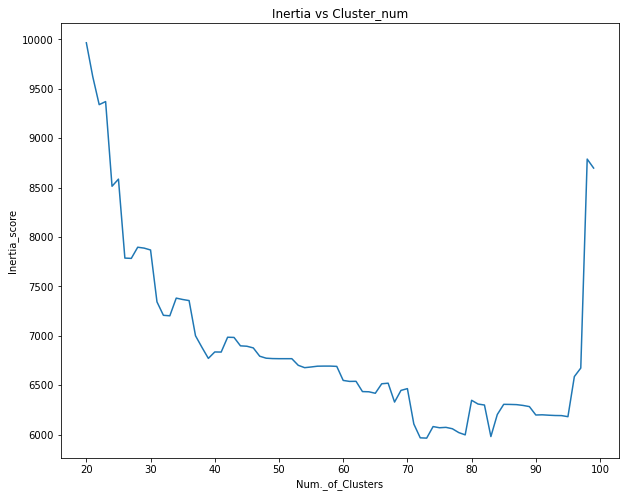

In [46]:
plt.figure(figsize=(10, 8))
plt.plot(range(20, 100), inertia_list3)
plt.title('Inertia vs Cluster_num')
plt.xlabel('Num._of_Clusters')
plt.ylabel('Inertia_score')
plt.show();

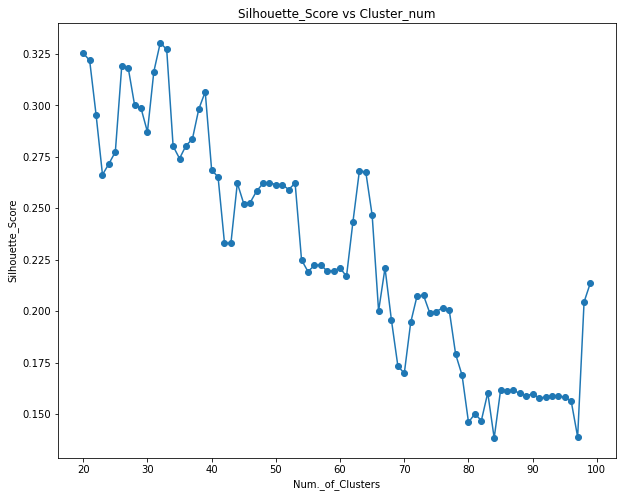

In [48]:
plt.figure(figsize=(10, 8))
plt.plot(range(20, 100), sil_scores3, marker='o')
plt.title('Silhouette_Score vs Cluster_num')
plt.xlabel('Num._of_Clusters')
plt.ylabel('Silhouette_Score')
plt.show();

    Silhouette scores greater than those obtained in KMeans Algorithm are obtained. The inertia scores are comparable.

In [49]:
result1 = pd.DataFrame({'Cluster_num': range(20, 100), 'Sil_Scores': sil_scores3})
result1.head(45)

,Cluster_num,Sil_Scores
0,20,0.325311
1,21,0.321830
2,22,0.295479
3,23,0.266285
4,24,0.271615
5,25,0.277360
6,26,0.319063
7,27,0.318350
8,28,0.300118
9,29,0.298603


In [50]:
kmed = KMedoids(n_clusters=39, random_state=60, method='alternate').fit(music_data_all_extra)
kmed

KMedoids(n_clusters=39, random_state=60)

In [51]:
music_data_all_extra['cluster'] = kmed.labels_
music_data_all_extra

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
Se Eu Quiser Falar Com Deus,1.736148,0.625604,2.163840,1.181894,1.232573,0.000091,6.747405,0.636175,2.916528,28
Saudade De Bahia,1.957784,0.963768,2.082332,0.580050,0.385401,0.000003,0.740484,1.440748,3.303977,11
"Canta Canta, Minha Gente",2.245383,1.763285,1.819200,5.817267,0.804547,0.000099,0.858131,1.881497,2.475836,19
Mulher Eu Sei,1.860158,0.121256,2.982875,0.789606,1.561140,0.000063,2.671280,1.089397,2.822090,25
Rosa Morena,1.717678,0.287440,3.261485,0.637049,1.626854,0.000533,0.719723,0.835759,3.195693,37
...,...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",0.532982,0.167633,3.851474,0.792959,1.628630,1.111977,0.575779,0.136175,2.322790,16
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",0.496042,0.243961,3.601680,0.740989,1.518515,0.662520,0.480277,0.073805,2.196697,16
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",0.157256,0.002246,7.073769,0.727578,1.689015,1.507001,0.534256,0.071518,1.891214,38
"Serenade For Strings In E, Op.22, B. 52: 1. Moderato",0.350923,0.050242,4.848180,0.702431,1.568244,0.785382,0.768166,0.122869,1.773259,38


#### **Inspect some Clusters**

In [52]:
music_data_all_extra[music_data_all_extra.cluster == 1]

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
So Nice (Summer Samba),2.039578,1.188406,1.889017,0.665549,0.975047,0.000000,0.712803,1.708940,3.225102,1
Bossa Dorado,2.058047,1.077295,2.195291,0.836547,1.257437,1.311044,0.816609,1.727651,3.520201,1
Menina Mulher Da Pele Preta,1.559367,1.345411,1.662605,0.979044,1.150875,0.075583,1.598616,2.035343,3.584357,1
Agua De Beber,1.701847,0.862319,2.573357,0.596815,0.756594,0.000000,0.503114,1.787942,3.906619,1
Todos os olhos,2.153034,1.004831,1.360119,0.958927,1.177515,0.000110,0.660208,1.939709,3.298269,1
Trem Das Onze,1.781003,1.084541,2.332290,1.027661,0.960838,0.005241,0.477509,1.669439,2.424970,1
Yegelle Tezeta,2.213720,0.840580,1.246007,0.606873,1.360448,1.297047,0.689273,1.634096,3.318483,1
Imik Si Mik,2.071240,1.178744,1.371316,0.581727,1.301838,0.000000,0.941176,1.623701,2.959704,1
In Your Hands,2.343008,0.794686,2.293595,1.047779,0.753041,0.590981,1.176471,1.426195,3.303845,1
Avant Gardener,1.905013,1.043478,1.433229,0.586756,1.452802,0.279938,0.570934,1.569647,3.113516,1


In [53]:
music_data_all_extra[music_data_all_extra.cluster == 5]

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
Os Grilos,1.511873,1.944444,1.865141,1.250629,0.662463,0.760499,0.577163,1.442827,2.643123,5
O Namorado Da Viúva,1.957784,1.799517,2.158077,0.749371,0.983927,0.000428,0.379931,2.018711,2.324957,5
Nomes de Favela,1.986807,1.246377,1.588507,1.109807,0.660687,0.000000,0.447751,1.792100,2.432765,5
El cel de les Illes Caimán,1.406332,1.212560,1.787914,1.089690,0.536364,0.014557,0.676817,1.594595,2.508495,5
Bo Diddley,2.134565,1.693237,2.055656,0.962280,0.312583,0.000000,1.273356,1.170478,2.792866,5
Crimson & Clover,1.203166,1.471014,1.937593,1.139983,0.488411,0.030793,0.747405,1.417879,2.231233,5
50 Ways to Leave Your Lover,2.150396,0.898551,2.109995,1.260687,0.294823,0.000180,0.530796,0.609148,2.686854,5
Forever In Blue Jeans,1.862797,0.942029,2.251441,0.543168,0.039251,0.000059,0.653287,1.744283,2.393553,5
I Shot The Sheriff,1.926121,1.543478,1.815412,0.878458,0.151496,0.003437,0.705882,1.367983,2.494253,5
Rock the Boat,1.641161,1.707729,1.453318,1.202012,0.113844,0.000000,0.441522,1.507277,2.836623,5


In [54]:
music_data_all_extra[music_data_all_extra.cluster == 10]

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
Les Dones Macabres,1.372032,2.036232,0.684505,0.590109,0.139242,0.039502,1.204152,1.309771,3.514758,10
Game Of Pricks,0.873351,2.091787,0.909765,0.764459,0.000735,0.037792,0.899654,0.721414,3.675149,10
Plants,1.701847,1.927536,0.671332,0.442582,0.312583,0.000449,0.698962,0.646570,2.883683,10
Going to Georgia,0.870712,1.826087,0.586037,0.616932,0.144570,0.007045,1.058824,1.209979,3.407346,10
Dirty Dirty Feeling,1.145119,2.084541,0.694385,0.719195,0.186484,0.000019,0.788927,0.808732,3.772387,10
...,...,...,...,...,...,...,...,...,...,...
Todo De Ti,2.058047,1.734300,0.593611,0.848282,0.550573,0.000253,0.644983,0.711019,3.380869,10
Pepas,2.010554,1.850242,0.651243,0.575021,0.013782,0.000109,0.885813,0.918919,3.435091,10
Thank You Lord - Live / Edit,1.754617,1.487923,1.164499,0.621961,0.007744,0.000008,0.961938,0.912682,3.114018,10
Do It Again,1.113456,1.159420,0.690433,0.551551,0.712193,0.000633,0.844291,0.434511,3.250786,10


In [55]:
music_data_all_extra[music_data_all_extra.cluster == 15]

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
Your Fucking Sunny Day,1.000000,1.188406,1.226906,0.444258,0.129829,0.912910,2.394464,0.461538,2.761792,15
Unfucktheworld,1.464380,1.731884,1.681541,1.133277,1.291182,1.077762,1.930796,0.144906,3.361818,15
Invisible Man,0.907652,2.304348,0.964268,0.903604,0.000089,1.082428,2.442907,1.540541,3.126146,15
Absolutely Cuckoo,0.920844,2.164251,1.743784,1.777033,0.002557,1.135305,1.986159,1.000000,3.744748,15
Afternoon,1.612137,2.248792,1.625720,1.961442,0.230885,1.360811,1.799308,0.719335,2.983855,15
...,...,...,...,...,...,...,...,...,...,...
And Jesus Wept,0.725594,2.335749,1.005599,1.369656,0.000520,1.132195,2.442907,0.276507,2.746862,15
Abnormally Deceased - Only Shreds Remains Demo '88,0.411609,2.125604,0.993413,1.465214,0.000085,1.365477,1.702422,0.688150,2.811600,15
Soulless Sanity (Promo 1995),0.931398,2.294686,1.001482,1.163453,0.000010,1.335927,1.799308,0.713098,3.518008,15
Plateau,0.572559,1.536232,2.391734,1.017603,0.026108,0.656300,2.096886,0.152183,2.156190,15


In [56]:
music_data_all_extra[music_data_all_extra.cluster == 20]

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
Xico,1.166227,1.352657,1.355343,2.330260,0.834739,0.000024,2.401384,1.293139,4.746809,20
Come Saturday,0.430079,2.265700,0.835007,1.200335,0.000003,1.463455,1.993080,1.020790,4.762796,20
Faithless - B-Side,0.968338,2.350242,0.360777,1.651299,0.000760,0.000023,2.560554,1.282744,4.493143,20
Objecte Pur,1.155673,2.352657,0.913716,0.875105,0.000006,1.158633,2.532872,1.488565,4.225472,20
Heart Of Glass - Special Mix,0.883905,2.236715,1.211757,1.877619,0.982151,0.003484,2.712803,1.962578,5.303792,20
...,...,...,...,...,...,...,...,...,...,...
Im Ascheregen,1.641161,2.200483,1.162193,1.676446,0.079744,0.003017,1.660900,0.528067,3.753204,20
Musik sein,1.200528,1.736715,1.010703,1.430008,0.171033,0.000000,1.647059,1.139293,4.139569,20
Se Preparó,1.949868,1.983092,0.697020,1.428332,0.394281,0.000015,2.152249,1.440748,4.520465,20
Just Like God,1.118734,1.828502,0.691750,1.362951,0.266406,0.000009,1.480969,0.636175,4.080433,20


In [57]:
music_data_all_extra[music_data_all_extra.cluster == 30]

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
III. Andante,1.189974,0.064976,4.330150,0.714166,1.736968,1.283050,0.816609,0.661123,3.141208,30
Comptine d'un autre été: L'après-midi,0.952507,0.149758,4.594928,0.735960,1.752953,1.447903,0.705882,0.754678,2.898190,30
Arc,0.712401,0.230918,3.983534,0.608550,1.731640,1.409022,0.673356,0.118919,3.617228,30
Upland,0.498681,0.094928,4.625062,0.573345,1.758281,1.365477,0.698962,0.322245,4.405047,30
Blinding Lights - Piano Version,0.944591,0.029710,4.544706,1.005868,1.765385,1.469676,0.823529,0.374220,3.929951,30
...,...,...,...,...,...,...,...,...,...,...
A Delicate Romance,0.372032,0.037923,5.579779,0.663873,1.747625,1.387249,0.768166,0.067360,3.734681,30
"Symphony in D Minor, M. 48: II. Allegretto",0.377309,0.042995,4.776717,0.648785,1.630406,1.251946,0.633218,0.081913,3.746572,30
Stravinsky: Symphony in C: I. Moderato alla breve,0.947230,0.077536,4.156924,0.710813,1.710328,1.169520,0.726644,0.623701,3.896367,30
Du cristal,0.422164,0.487923,3.898238,0.808047,0.495515,1.345259,0.379931,0.078378,3.493592,30


#### **Using an Initial Coarse grouping based on Mode**

##### **First Set**

In [76]:
music_data1 = music_data[music_data['mode'] == 0]
music_data1

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
Se Eu Quiser Falar Com Deus,0.6580,0.2590,0.219017,0,0.0705,0.694,0.000059,0.9750,0.3060,110.376,256213,4
Madalena,0.6750,0.2070,0.230333,0,0.0545,0.963,0.414000,0.1120,0.6840,93.531,145187,4
Blue Bossa - Remastered,0.4800,0.4330,0.165150,0,0.0532,0.608,0.694000,0.1080,0.8970,82.315,271147,4
Aqua De Coco,0.7550,0.7320,0.160000,0,0.0658,0.487,0.000910,0.4540,0.8160,88.028,287560,4
Mas Que Nada,0.6180,0.5390,0.211483,0,0.0312,0.156,0.002140,0.1870,0.9160,88.646,178880,4
...,...,...,...,...,...,...,...,...,...,...,...,...
"The Nutcracker, Op.71, TH.14 / Act 1: No. 2 March",0.5880,0.2370,0.304283,0,0.0373,0.940,0.941000,0.3340,0.5400,78.723,133600,4
"Symphony No. 6 in A Major, WAB 106 (ed. L. Nowak): I. Maestoso",0.1870,0.0734,0.346417,0,0.0399,0.853,0.818000,0.1060,0.0507,108.213,972560,4
Symphony No. 6,0.0864,0.0665,0.441917,0,0.0452,0.828,0.797000,0.1350,0.0387,77.880,3590693,3
"Music for Strings, Percussion and Celesta, BB 114: II. Allegro",0.3860,0.1240,0.381150,0,0.0440,0.945,0.917000,0.0853,0.3190,142.307,443907,4


In [77]:
music_data1.describe()

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1852.000000,1852.000000,1852.000000,1852.0,1852.000000,1852.000000,1852.000000,1852.000000,1852.000000,1852.000000,1.852000e+03,1852.000000
mean,0.535701,0.656861,0.151260,0.0,0.087150,0.276162,0.258848,0.187314,0.441357,118.538463,2.494881e+05,3.910367
std,0.218522,0.285612,0.108922,0.0,0.074046,0.350399,0.374917,0.157265,0.270713,27.915837,1.330473e+05,0.426766
min,0.000000,0.000000,-0.022367,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.276000e+04,0.000000
25%,0.344750,0.498000,0.082350,0.0,0.040900,0.003880,0.000000,0.092150,0.199750,96.110500,1.951805e+05,4.000000
50%,0.574500,0.739000,0.115558,0.0,0.059150,0.084050,0.001480,0.126000,0.417500,120.003500,2.247335e+05,4.000000
75%,0.711000,0.887000,0.182921,0.0,0.103000,0.509500,0.663750,0.235000,0.670250,131.995000,2.713330e+05,4.000000
max,0.967000,0.999000,1.000000,0.0,0.918000,0.996000,0.977000,0.987000,0.985000,205.863000,3.590693e+06,5.000000


In [78]:
# good data: instrumentalness, danceability, energy, acousticness, valence.

# good data with outliers: liveness, loudness.

# data to rescale: tempo, duration_ms.

# data to drop: mode, time_signature.

In [79]:
music_data1.time_signature.value_counts()

4    1675
3     129
5      27
1      20
0       1
Name: time_signature, dtype: int64

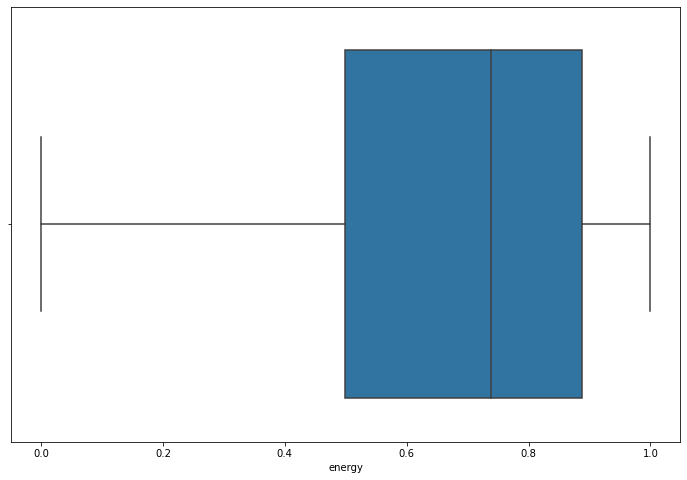

In [80]:
plt.subplots(figsize=(12, 8))
sns.boxplot(data=music_data1, x='energy')
plt.show()

In [81]:
music_data1_bv = music_data1[['mode', 'time_signature']]
music_data1_bv

,mode,time_signature
Se Eu Quiser Falar Com Deus,0,4
Madalena,0,4
Blue Bossa - Remastered,0,4
Aqua De Coco,0,4
Mas Que Nada,0,4
...,...,...
"The Nutcracker, Op.71, TH.14 / Act 1: No. 2 March",0,4
"Symphony No. 6 in A Major, WAB 106 (ed. L. Nowak): I. Maestoso",0,4
Symphony No. 6,0,3
"Music for Strings, Percussion and Celesta, BB 114: II. Allegro",0,4


In [82]:
music_data_all = pd.DataFrame(RobustScaler(with_centering=False).fit_transform(music_data1.drop(['mode', 'time_signature'], axis=1)))
music_data_all.columns = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
music_data_all.index = list(music_data1.index)
music_data_all

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
Se Eu Quiser Falar Com Deus,1.796587,0.665810,2.177735,1.135266,1.372572,0.000088,6.825341,0.650372,3.075868,3.364473
Madalena,1.843003,0.532134,2.290260,0.877617,1.904592,0.623729,0.784039,1.453773,2.606446,1.906530
Blue Bossa - Remastered,1.310580,1.113111,1.642126,0.856683,1.202484,1.045574,0.756038,1.906482,2.293887,3.560579
Aqua De Coco,2.061433,1.881748,1.590919,1.059581,0.963174,0.001371,3.178159,1.734325,2.453093,3.776107
Mas Que Nada,1.687372,1.385604,2.102830,0.502415,0.308532,0.003224,1.309065,1.946865,2.470314,2.348971
...,...,...,...,...,...,...,...,...,...,...
"The Nutcracker, Op.71, TH.14 / Act 1: No. 2 March",1.605461,0.609254,3.025562,0.600644,1.859104,1.417702,2.338117,1.147715,2.193788,1.754374
"Symphony No. 6 in A Major, WAB 106 (ed. L. Nowak): I. Maestoso",0.510580,0.188689,3.444504,0.642512,1.687038,1.232392,0.742037,0.107758,3.015592,12.771216
Symphony No. 6,0.235904,0.170951,4.394084,0.727858,1.637593,1.200753,0.945047,0.082253,2.170296,47.151348
"Music for Strings, Percussion and Celesta, BB 114: II. Allegro",1.053925,0.318766,3.789866,0.708535,1.868993,1.381544,0.597130,0.678002,3.965695,5.829185


In [83]:
music_data_all.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,1852.000000,1852.000000,1852.000000,1852.000000,1852.000000,1852.000000,1852.000000,1852.000000,1852.000000,1852.000000
mean,1.462665,1.688590,1.504018,1.403383,0.546185,0.389978,1.311267,0.938060,3.303333,3.276164
std,0.596648,0.734221,1.083035,1.192360,0.693008,0.564847,1.100908,0.575374,0.777936,1.747117
min,0.000000,0.000000,-0.222397,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.430189
25%,0.941297,1.280206,0.818826,0.658615,0.007674,0.000000,0.645082,0.424548,2.678329,2.563022
50%,1.568601,1.899743,1.149024,0.952496,0.166232,0.002230,0.882044,0.887354,3.344160,2.951098
75%,1.941297,2.280206,1.818826,1.658615,1.007674,1.000000,1.645082,1.424548,3.678329,3.563022
max,2.640273,2.568123,9.943241,14.782609,1.969859,1.471940,6.909345,2.093518,5.736822,47.151348


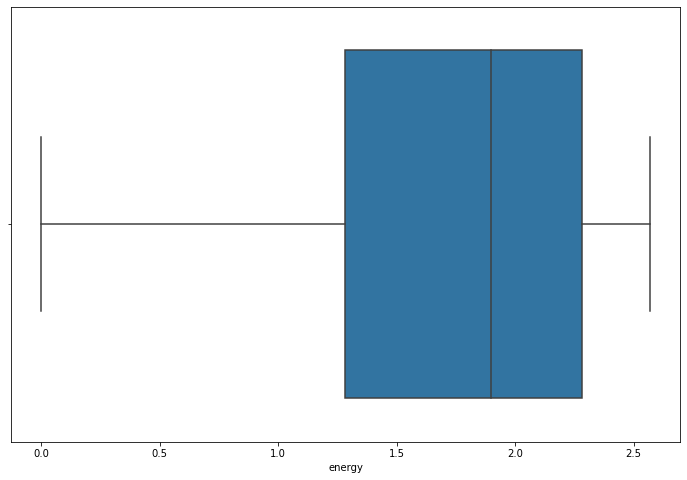

In [84]:
plt.subplots(figsize=(12, 8))
sns.boxplot(data=music_data_all, x='energy')
plt.show()

In [85]:
# RobustScaling did not change the distribution, it only changes the scale.

In [113]:
inertia_list4 = []
sil_scores4 = []

for i in range(5, 25):
    kmns = KMeans(n_clusters=i, n_init=35, random_state=60).fit(music_data_all)
    inertia_list4.append(round(kmns.inertia_))
    sil_scores4.append(silhouette_score(music_data_all, kmns.labels_))

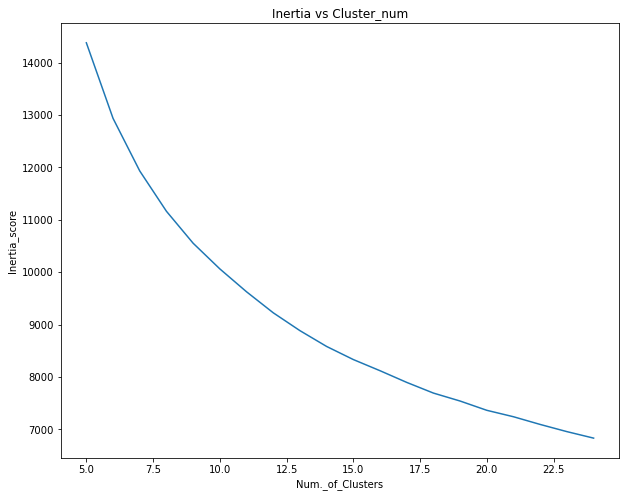

In [114]:
plt.figure(figsize=(10, 8))
plt.plot(range(5, 25), inertia_list4)
plt.title('Inertia vs Cluster_num')
plt.xlabel('Num._of_Clusters')
plt.ylabel('Inertia_score')
plt.show();

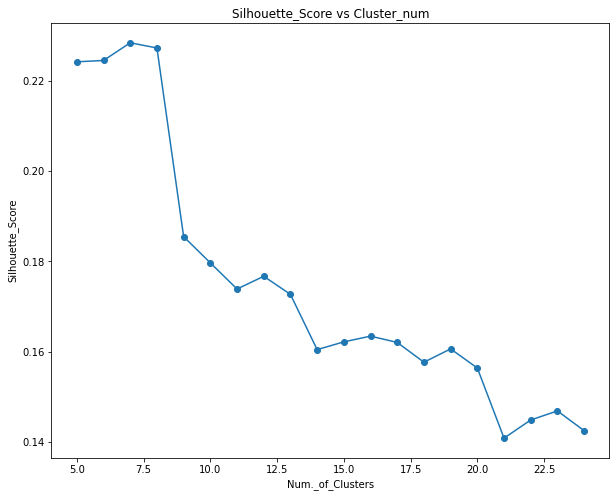

In [115]:
plt.figure(figsize=(10, 8))
plt.plot(range(5, 25), sil_scores4, marker='o')
plt.title('Silhouette_Score vs Cluster_num')
plt.xlabel('Num._of_Clusters')
plt.ylabel('Silhouette_Score')
plt.show();

In [116]:
inertia_list5 = []
sil_scores5 = []

for i in range(5, 25):
    kmed = KMedoids(n_clusters=i, random_state=60, method='pam').fit(music_data_all)
    inertia_list5.append(round(kmed.inertia_))
    sil_scores5.append(silhouette_score(music_data_all, kmed.labels_))

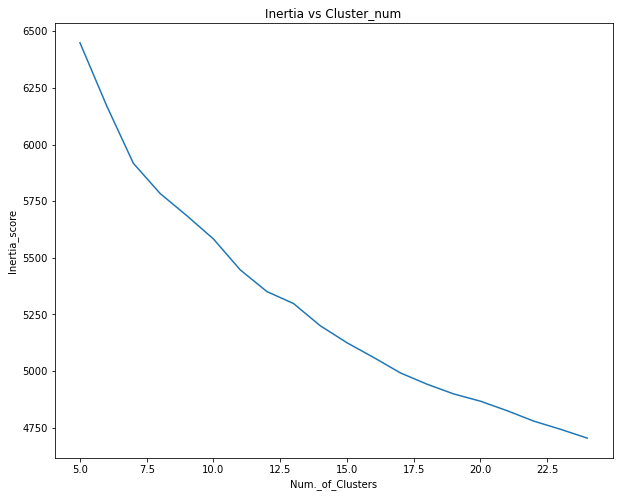

In [117]:
plt.figure(figsize=(10, 8))
plt.plot(range(5, 25), inertia_list5)
plt.title('Inertia vs Cluster_num')
plt.xlabel('Num._of_Clusters')
plt.ylabel('Inertia_score')
plt.show();

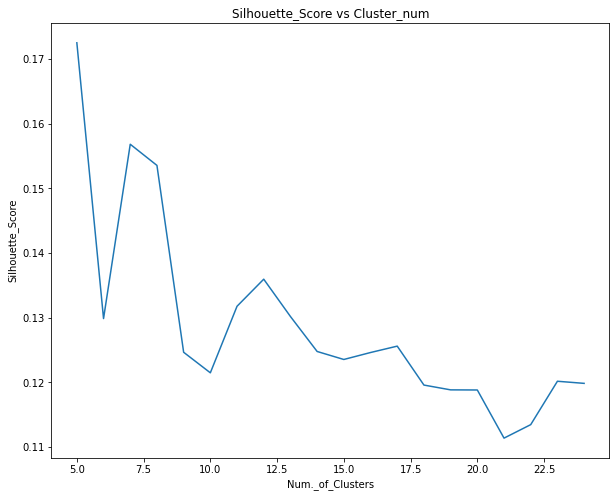

In [118]:
plt.figure(figsize=(10, 8))
plt.plot(range(5, 25), sil_scores5)
plt.title('Silhouette_Score vs Cluster_num')
plt.xlabel('Num._of_Clusters')
plt.ylabel('Silhouette_Score')
plt.show();

##### **Second Set**

In [119]:
music_data2 = music_data[music_data['mode'] == 1]
music_data2

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
Saudade De Bahia,0.7420,0.39900,0.210767,1,0.0346,0.217,0.000002,0.1070,0.6930,125.039,191867,4
"Canta Canta, Minha Gente",0.8510,0.73000,0.184133,1,0.3470,0.453,0.000063,0.1240,0.9050,93.698,152267,4
Mulher Eu Sei,0.7050,0.05020,0.301917,1,0.0471,0.879,0.000041,0.3860,0.5240,106.802,186227,4
Rosa Morena,0.6510,0.11900,0.330117,1,0.0380,0.916,0.000343,0.1040,0.4020,120.941,273680,4
Desafinado,0.4660,0.14600,0.291667,1,0.0649,0.931,0.154000,0.1070,0.4230,142.885,249387,4
...,...,...,...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",0.2020,0.06940,0.389833,1,0.0473,0.917,0.715000,0.0832,0.0655,87.906,995000,4
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",0.1880,0.10100,0.364550,1,0.0442,0.855,0.426000,0.0694,0.0355,83.134,855000,4
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",0.0596,0.00093,0.715983,1,0.0434,0.951,0.969000,0.0772,0.0344,71.573,238187,3
"Serenade For Strings In E, Op.22, B. 52: 1. Moderato",0.1330,0.02080,0.490717,1,0.0419,0.883,0.505000,0.1110,0.0591,67.109,314307,4


In [120]:
music_data2.describe()

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,3383.000000,3383.000000,3383.000000,3383.0,3383.000000,3383.000000,3383.000000,3383.000000,3383.000000,3383.000000,3.383000e+03,3383.000000
mean,0.495161,0.651760,0.158030,1.0,0.081004,0.297642,0.256509,0.184280,0.444822,118.821559,2.470479e+05,3.898906
std,0.216470,0.289841,0.102591,0.0,0.069497,0.358830,0.368402,0.144942,0.281522,28.923098,1.370397e+05,0.416764
min,0.059600,0.000020,-0.019133,1.0,0.022600,0.000000,0.000000,0.010900,0.019600,34.856000,3.638700e+04,1.000000
25%,0.292500,0.473000,0.090875,1.0,0.037900,0.001740,0.000001,0.092600,0.193000,96.280500,1.866095e+05,4.000000
50%,0.519000,0.737000,0.125800,1.0,0.053700,0.104000,0.002360,0.125000,0.417000,118.340000,2.246670e+05,4.000000
75%,0.672000,0.898000,0.191067,1.0,0.096550,0.590500,0.629000,0.238000,0.680000,135.250500,2.718465e+05,4.000000
max,0.962000,1.000000,0.740100,1.0,0.576000,0.996000,0.985000,0.976000,0.985000,213.990000,3.815787e+06,5.000000


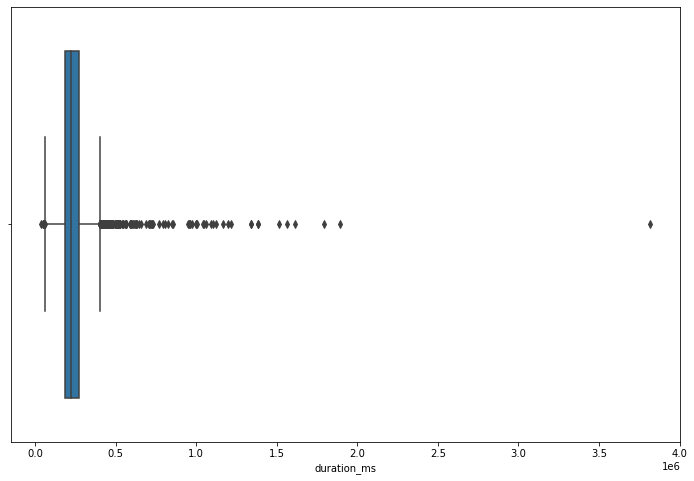

In [121]:
plt.subplots(figsize=(12, 8))
sns.boxplot(data=music_data2, x='duration_ms')
plt.show()

In [122]:
music_data2_bv = music_data2[['mode', 'time_signature']]
music_data2_bv

,mode,time_signature
Saudade De Bahia,1,4
"Canta Canta, Minha Gente",1,4
Mulher Eu Sei,1,4
Rosa Morena,1,4
Desafinado,1,4
...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",1,4
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",1,4
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",1,3
"Serenade For Strings In E, Op.22, B. 52: 1. Moderato",1,4


In [123]:
music_data2 = music_data2.drop(['mode', 'time_signature'], axis=1)
music_data2

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
Saudade De Bahia,0.7420,0.39900,0.210767,0.0346,0.217,0.000002,0.1070,0.6930,125.039,191867
"Canta Canta, Minha Gente",0.8510,0.73000,0.184133,0.3470,0.453,0.000063,0.1240,0.9050,93.698,152267
Mulher Eu Sei,0.7050,0.05020,0.301917,0.0471,0.879,0.000041,0.3860,0.5240,106.802,186227
Rosa Morena,0.6510,0.11900,0.330117,0.0380,0.916,0.000343,0.1040,0.4020,120.941,273680
Desafinado,0.4660,0.14600,0.291667,0.0649,0.931,0.154000,0.1070,0.4230,142.885,249387
...,...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",0.2020,0.06940,0.389833,0.0473,0.917,0.715000,0.0832,0.0655,87.906,995000
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",0.1880,0.10100,0.364550,0.0442,0.855,0.426000,0.0694,0.0355,83.134,855000
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",0.0596,0.00093,0.715983,0.0434,0.951,0.969000,0.0772,0.0344,71.573,238187
"Serenade For Strings In E, Op.22, B. 52: 1. Moderato",0.1330,0.02080,0.490717,0.0419,0.883,0.505000,0.1110,0.0591,67.109,314307


In [124]:
music_data_all = pd.DataFrame(RobustScaler(with_centering=False).fit_transform(music_data2))
music_data_all.columns = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
music_data_all.index = list(music_data2.index)
music_data_all

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
Saudade De Bahia,1.955204,0.938824,2.103635,0.589940,0.368571,0.000003,0.735901,1.422998,3.208596,2.250983
"Canta Canta, Minha Gente",2.242424,1.717647,1.837811,5.916454,0.769414,0.000101,0.852820,1.858316,2.404362,1.786396
Mulher Eu Sei,1.857708,0.118118,3.013391,0.803069,1.492968,0.000064,2.654746,1.075975,2.740621,2.184814
Rosa Morena,1.715415,0.280000,3.294852,0.647911,1.555812,0.000545,0.715268,0.825462,3.103439,3.210812
Desafinado,1.227931,0.343529,2.911087,1.106564,1.581289,0.244834,0.735901,0.868583,3.666538,2.925807
...,...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",0.532279,0.163294,3.890876,0.806479,1.557511,1.136727,0.572215,0.134497,2.255735,11.673334
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",0.495389,0.237647,3.638526,0.753623,1.452205,0.677267,0.477304,0.072895,2.133282,10.030855
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",0.157049,0.002188,7.146137,0.739983,1.615259,1.540544,0.530949,0.070637,1.836618,2.794409
"Serenade For Strings In E, Op.22, B. 52: 1. Moderato",0.350461,0.048941,4.897779,0.714408,1.499762,0.802863,0.763411,0.121355,1.722068,3.687448


In [125]:
music_data_all.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,3383.000000,3383.000000,3383.000000,3383.000000,3383.000000,3383.000000,3383.000000,3383.000000,3383.000000,3383.000000
mean,1.304772,1.533553,1.577275,1.381141,0.505541,0.407806,1.267400,0.913393,3.049052,2.898364
std,0.570409,0.681979,1.023951,1.184948,0.609467,0.585697,0.996851,0.578074,0.742189,1.607749
min,0.157049,0.000048,-0.190967,0.385337,0.000000,0.000000,0.074966,0.040246,0.894432,0.426892
25%,0.770751,1.112941,0.907012,0.646206,0.002955,0.000002,0.636864,0.396304,2.470631,2.189302
50%,1.367589,1.734118,1.255593,0.915601,0.176642,0.003752,0.859697,0.856263,3.036695,2.635792
75%,1.770751,2.112941,1.907012,1.646206,1.002955,1.000002,1.636864,1.396304,3.470631,3.189302
max,2.534914,2.352941,7.386842,9.820972,1.691691,1.565981,6.712517,2.022587,5.491147,44.766791


In [126]:
inertia_list6 = []
sil_scores6 = []

for i in range(15, 30):
    kmns = KMeans(n_clusters=i, n_init=35, random_state=4).fit(music_data_all)
    inertia_list6.append(round(kmns.inertia_))
    sil_scores6.append(silhouette_score(music_data_all, kmns.labels_))

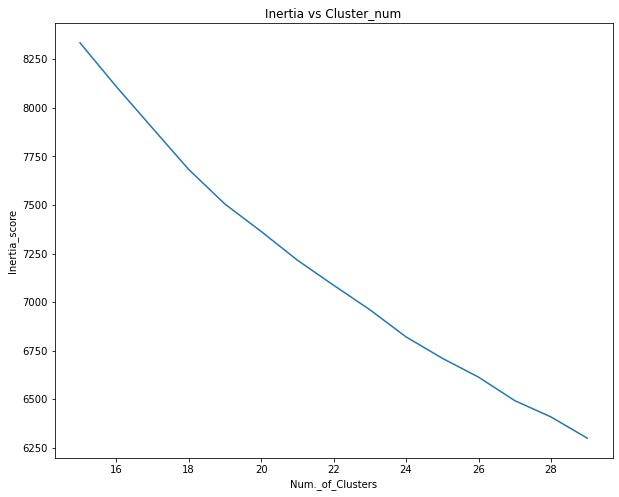

In [127]:
plt.figure(figsize=(10, 8))
plt.plot(range(15, 30), inertia_list6)
plt.title('Inertia vs Cluster_num')
plt.xlabel('Num._of_Clusters')
plt.ylabel('Inertia_score')
plt.show();

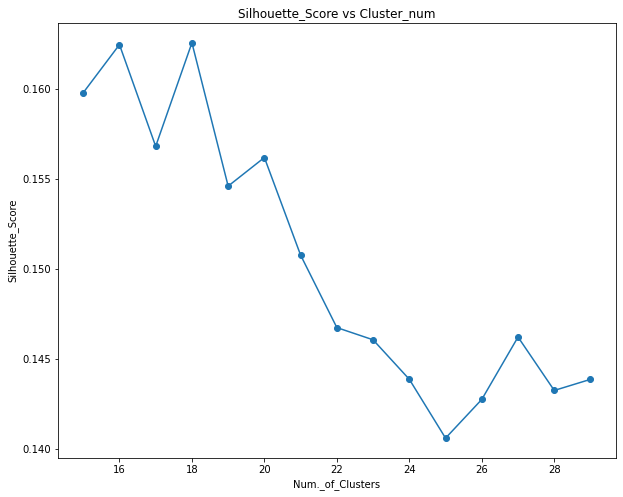

In [128]:
plt.figure(figsize=(10, 8))
plt.plot(range(15, 30), sil_scores6, marker='o')
plt.title('Silhouette_Score vs Cluster_num')
plt.xlabel('Num._of_Clusters')
plt.ylabel('Silhouette_Score')
plt.show();

In [158]:
kmns = KMeans(n_clusters=20, n_init=35, random_state=4).fit(music_data_all)
kmns

KMeans(n_clusters=20, n_init=35, random_state=4)

In [159]:
music_data_all['cluster'] = kmns.labels_
music_data_all

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster
Saudade De Bahia,1.955204,0.938824,2.103635,0.589940,0.368571,0.000003,0.735901,1.422998,3.208596,2.250983,15
"Canta Canta, Minha Gente",2.242424,1.717647,1.837811,5.916454,0.769414,0.000101,0.852820,1.858316,2.404362,1.786396,8
Mulher Eu Sei,1.857708,0.118118,3.013391,0.803069,1.492968,0.000064,2.654746,1.075975,2.740621,2.184814,10
Rosa Morena,1.715415,0.280000,3.294852,0.647911,1.555812,0.000545,0.715268,0.825462,3.103439,3.210812,4
Desafinado,1.227931,0.343529,2.911087,1.106564,1.581289,0.244834,0.735901,0.868583,3.666538,2.925807,4
...,...,...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",0.532279,0.163294,3.890876,0.806479,1.557511,1.136727,0.572215,0.134497,2.255735,11.673334,5
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",0.495389,0.237647,3.638526,0.753623,1.452205,0.677267,0.477304,0.072895,2.133282,10.030855,5
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",0.157049,0.002188,7.146137,0.739983,1.615259,1.540544,0.530949,0.070637,1.836618,2.794409,7
"Serenade For Strings In E, Op.22, B. 52: 1. Moderato",0.350461,0.048941,4.897779,0.714408,1.499762,0.802863,0.763411,0.121355,1.722068,3.687448,7


#### **Visualize the Clustering using TSNE and PCA**

In [162]:
music_data_all = music_data_all.drop('cluster', axis=1)
pca = PCA(n_components=2)
pca_results = pca.fit_transform(music_data_all[music_data_all.columns].values)
pca_results

array([[-0.33005236, -1.21865179],
       [-1.82432945,  2.00388325],
       [ 0.20048495, -1.78963624],
       ...,
       [ 2.91377532, -4.08372519],
       [ 2.75741797, -2.5611159 ],
       [ 8.6919638 ,  1.32025631]])

In [170]:
music_data_all1 = music_data_all.copy()
music_data_all1

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
Saudade De Bahia,1.955204,0.938824,2.103635,0.589940,0.368571,0.000003,0.735901,1.422998,3.208596,2.250983
"Canta Canta, Minha Gente",2.242424,1.717647,1.837811,5.916454,0.769414,0.000101,0.852820,1.858316,2.404362,1.786396
Mulher Eu Sei,1.857708,0.118118,3.013391,0.803069,1.492968,0.000064,2.654746,1.075975,2.740621,2.184814
Rosa Morena,1.715415,0.280000,3.294852,0.647911,1.555812,0.000545,0.715268,0.825462,3.103439,3.210812
Desafinado,1.227931,0.343529,2.911087,1.106564,1.581289,0.244834,0.735901,0.868583,3.666538,2.925807
...,...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",0.532279,0.163294,3.890876,0.806479,1.557511,1.136727,0.572215,0.134497,2.255735,11.673334
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",0.495389,0.237647,3.638526,0.753623,1.452205,0.677267,0.477304,0.072895,2.133282,10.030855
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",0.157049,0.002188,7.146137,0.739983,1.615259,1.540544,0.530949,0.070637,1.836618,2.794409
"Serenade For Strings In E, Op.22, B. 52: 1. Moderato",0.350461,0.048941,4.897779,0.714408,1.499762,0.802863,0.763411,0.121355,1.722068,3.687448


In [171]:
music_data_all1['pca-x'] = pca_results[:,0]
music_data_all1['pca-y'] = pca_results[:,1]
music_data_all1['cluster'] = kmns.labels_
music_data_all1

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,pca-x,pca-y,cluster
Saudade De Bahia,1.955204,0.938824,2.103635,0.589940,0.368571,0.000003,0.735901,1.422998,3.208596,2.250983,-0.330052,-1.218652,15
"Canta Canta, Minha Gente",2.242424,1.717647,1.837811,5.916454,0.769414,0.000101,0.852820,1.858316,2.404362,1.786396,-1.824329,2.003883,8
Mulher Eu Sei,1.857708,0.118118,3.013391,0.803069,1.492968,0.000064,2.654746,1.075975,2.740621,2.184814,0.200485,-1.789636,10
Rosa Morena,1.715415,0.280000,3.294852,0.647911,1.555812,0.000545,0.715268,0.825462,3.103439,3.210812,1.311500,-1.855637,4
Desafinado,1.227931,0.343529,2.911087,1.106564,1.581289,0.244834,0.735901,0.868583,3.666538,2.925807,0.886297,-1.484999,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",0.532279,0.163294,3.890876,0.806479,1.557511,1.136727,0.572215,0.134497,2.255735,11.673334,9.242598,1.521273,5
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",0.495389,0.237647,3.638526,0.753623,1.452205,0.677267,0.477304,0.072895,2.133282,10.030855,7.690664,0.923570,5
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",0.157049,0.002188,7.146137,0.739983,1.615259,1.540544,0.530949,0.070637,1.836618,2.794409,2.913775,-4.083725,7
"Serenade For Strings In E, Op.22, B. 52: 1. Moderato",0.350461,0.048941,4.897779,0.714408,1.499762,0.802863,0.763411,0.121355,1.722068,3.687448,2.757418,-2.561116,7


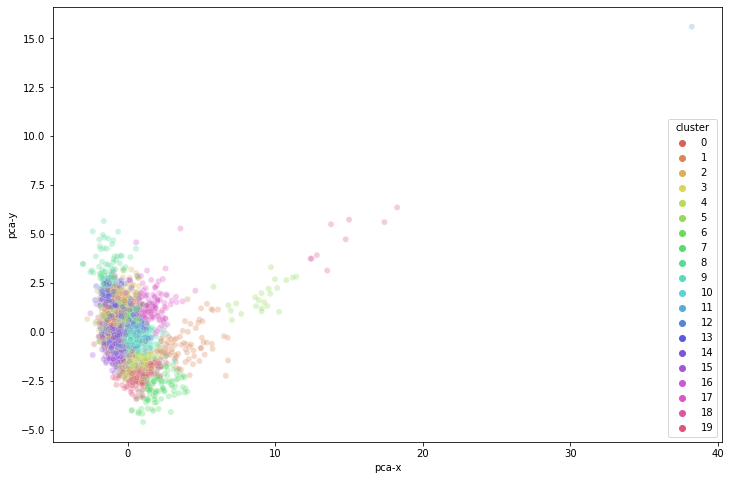

In [180]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='pca-x', 
                y='pca-y', 
                hue='cluster', 
                palette=sns.color_palette('hls', 20),
                data=music_data_all1,
                legend='full',
                alpha=0.3
               )
plt.show();

In [182]:
music_data_all2 = music_data_all.drop('duration_ms', axis=1)
pca = PCA(n_components=2)
pca_results = pca.fit_transform(music_data_all2[music_data_all2.columns].values)
pca_results

array([[ 0.82465796, -0.72503531],
       [-2.35805777,  3.28740855],
       [ 1.71008487,  0.21128048],
       ...,
       [ 5.333963  ,  2.90413917],
       [ 3.76709773,  1.74203693],
       [ 2.97583243,  1.03800191]])

In [184]:
music_data_all2['pca-x'] = pca_results[:,0]
music_data_all2['pca-y'] = pca_results[:,1]
music_data_all2['cluster'] = kmns.labels_
music_data_all2

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,pca-x,pca-y,cluster
Saudade De Bahia,1.955204,0.938824,2.103635,0.589940,0.368571,0.000003,0.735901,1.422998,3.208596,0.824658,-0.725035,15
"Canta Canta, Minha Gente",2.242424,1.717647,1.837811,5.916454,0.769414,0.000101,0.852820,1.858316,2.404362,-2.358058,3.287409,8
Mulher Eu Sei,1.857708,0.118118,3.013391,0.803069,1.492968,0.000064,2.654746,1.075975,2.740621,1.710085,0.211280,10
Rosa Morena,1.715415,0.280000,3.294852,0.647911,1.555812,0.000545,0.715268,0.825462,3.103439,2.257883,0.237360,4
Desafinado,1.227931,0.343529,2.911087,1.106564,1.581289,0.244834,0.735901,0.868583,3.666538,1.768852,0.528964,4
...,...,...,...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",0.532279,0.163294,3.890876,0.806479,1.557511,1.136727,0.572215,0.134497,2.255735,3.075672,1.376359,5
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",0.495389,0.237647,3.638526,0.753623,1.452205,0.677267,0.477304,0.072895,2.133282,2.862858,1.141390,5
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",0.157049,0.002188,7.146137,0.739983,1.615259,1.540544,0.530949,0.070637,1.836618,5.333963,2.904139,7
"Serenade For Strings In E, Op.22, B. 52: 1. Moderato",0.350461,0.048941,4.897779,0.714408,1.499762,0.802863,0.763411,0.121355,1.722068,3.767098,1.742037,7


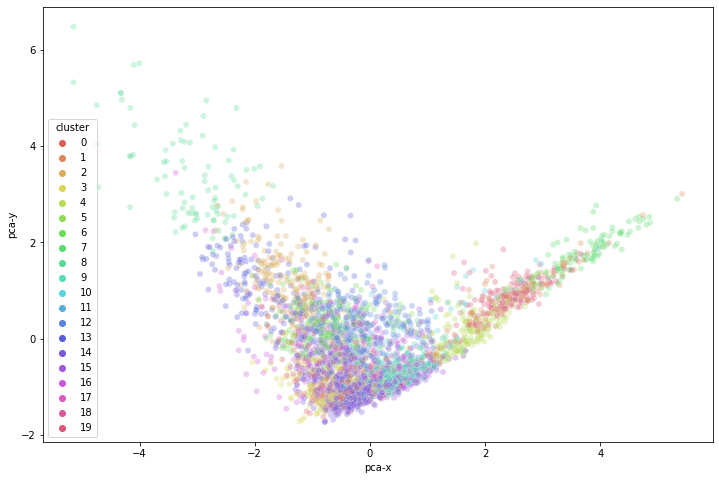

In [185]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='pca-x', 
                y='pca-y', 
                hue='cluster', 
                palette=sns.color_palette('hls', 20),
                data=music_data_all2,
                legend='full',
                alpha=0.3
               )
plt.show();

In [188]:
music_data_all

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
Saudade De Bahia,1.955204,0.938824,2.103635,0.589940,0.368571,0.000003,0.735901,1.422998,3.208596,2.250983
"Canta Canta, Minha Gente",2.242424,1.717647,1.837811,5.916454,0.769414,0.000101,0.852820,1.858316,2.404362,1.786396
Mulher Eu Sei,1.857708,0.118118,3.013391,0.803069,1.492968,0.000064,2.654746,1.075975,2.740621,2.184814
Rosa Morena,1.715415,0.280000,3.294852,0.647911,1.555812,0.000545,0.715268,0.825462,3.103439,3.210812
Desafinado,1.227931,0.343529,2.911087,1.106564,1.581289,0.244834,0.735901,0.868583,3.666538,2.925807
...,...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",0.532279,0.163294,3.890876,0.806479,1.557511,1.136727,0.572215,0.134497,2.255735,11.673334
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",0.495389,0.237647,3.638526,0.753623,1.452205,0.677267,0.477304,0.072895,2.133282,10.030855
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",0.157049,0.002188,7.146137,0.739983,1.615259,1.540544,0.530949,0.070637,1.836618,2.794409
"Serenade For Strings In E, Op.22, B. 52: 1. Moderato",0.350461,0.048941,4.897779,0.714408,1.499762,0.802863,0.763411,0.121355,1.722068,3.687448


In [189]:
music_data_all3 = music_data_all.drop('duration_ms', axis=1)
pca = PCA(n_components=3)
pca_results = pca.fit_transform(music_data_all3[music_data_all3.columns].values)
pca_results

array([[ 0.82465796, -0.72503531, -0.50399973],
       [-2.35805777,  3.28740855, -1.12221041],
       [ 1.71008487,  0.21128048,  1.52519367],
       ...,
       [ 5.333963  ,  2.90413917,  0.22281114],
       [ 3.76709773,  1.74203693,  0.16469236],
       [ 2.97583243,  1.03800191,  1.17383142]])

In [190]:
music_data_all3['pca-x'] = pca_results[:,0]
music_data_all3['pca-y'] = pca_results[:,1]
music_data_all3['pca-z'] = pca_results[:,2]
music_data_all3['cluster'] = kmns.labels_
music_data_all3

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,pca-x,pca-y,pca-z,cluster
Saudade De Bahia,1.955204,0.938824,2.103635,0.589940,0.368571,0.000003,0.735901,1.422998,3.208596,0.824658,-0.725035,-0.504000,15
"Canta Canta, Minha Gente",2.242424,1.717647,1.837811,5.916454,0.769414,0.000101,0.852820,1.858316,2.404362,-2.358058,3.287409,-1.122210,8
Mulher Eu Sei,1.857708,0.118118,3.013391,0.803069,1.492968,0.000064,2.654746,1.075975,2.740621,1.710085,0.211280,1.525194,10
Rosa Morena,1.715415,0.280000,3.294852,0.647911,1.555812,0.000545,0.715268,0.825462,3.103439,2.257883,0.237360,-0.294962,4
Desafinado,1.227931,0.343529,2.911087,1.106564,1.581289,0.244834,0.735901,0.868583,3.666538,1.768852,0.528964,-0.314901,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",0.532279,0.163294,3.890876,0.806479,1.557511,1.136727,0.572215,0.134497,2.255735,3.075672,1.376359,-0.134921,5
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",0.495389,0.237647,3.638526,0.753623,1.452205,0.677267,0.477304,0.072895,2.133282,2.862858,1.141390,-0.270075,5
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",0.157049,0.002188,7.146137,0.739983,1.615259,1.540544,0.530949,0.070637,1.836618,5.333963,2.904139,0.222811,7
"Serenade For Strings In E, Op.22, B. 52: 1. Moderato",0.350461,0.048941,4.897779,0.714408,1.499762,0.802863,0.763411,0.121355,1.722068,3.767098,1.742037,0.164692,7


C:\Users\Privat\AppData\Local\Temp\ipykernel_25372\3432506784.py:1: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.figure(figsize=(16,10)).gca(projection='3d')


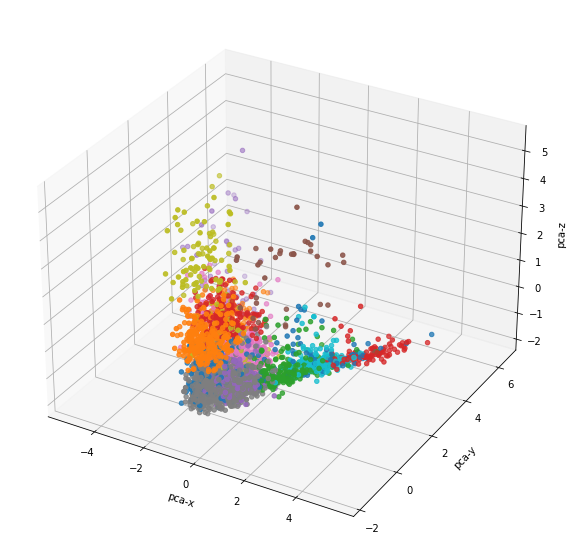

In [196]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(xs="pca-x", 
           ys="pca-y", 
           zs="pca-z", 
           c='cluster', 
           cmap='tab10',
           data=music_data_all3
          )

ax.set_xlabel('pca-x')
ax.set_ylabel('pca-y')
ax.set_zlabel('pca-z')
plt.show();

In [208]:
music_data_all4 = music_data_all.drop('duration_ms', axis=1)
tsne = TSNE(n_components=2, verbose=1, perplexity=20, n_iter=600)
tsne_results = tsne.fit_transform(music_data_all4[music_data_all4.columns].values)
tsne_results

C:\Users\Privat\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Privat\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 3383 samples in 0.009s...
[t-SNE] Computed neighbors for 3383 samples in 0.235s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3383
[t-SNE] Computed conditional probabilities for sample 2000 / 3383
[t-SNE] Computed conditional probabilities for sample 3000 / 3383
[t-SNE] Computed conditional probabilities for sample 3383 / 3383
[t-SNE] Mean sigma: 0.413409
[t-SNE] KL divergence after 250 iterations with early exaggeration: 79.247589
[t-SNE] KL divergence after 600 iterations: 1.447337


array([[ -3.673043,  47.331722],
       [ 13.248132, -51.908688],
       [ 39.23179 ,  10.134269],
       ...,
       [ 68.23427 ,  40.069054],
       [ 62.925797,  33.641575],
       [ 56.796   ,  23.627033]], dtype=float32)

In [209]:
music_data_all4['tsne-x'] = tsne_results[:,0]
music_data_all4['tsne-y'] = tsne_results[:,1]
music_data_all4['cluster'] = kmns.labels_
music_data_all4

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,tsne-x,tsne-y,cluster
Saudade De Bahia,1.955204,0.938824,2.103635,0.589940,0.368571,0.000003,0.735901,1.422998,3.208596,-3.673043,47.331722,15
"Canta Canta, Minha Gente",2.242424,1.717647,1.837811,5.916454,0.769414,0.000101,0.852820,1.858316,2.404362,13.248132,-51.908688,8
Mulher Eu Sei,1.857708,0.118118,3.013391,0.803069,1.492968,0.000064,2.654746,1.075975,2.740621,39.231789,10.134269,10
Rosa Morena,1.715415,0.280000,3.294852,0.647911,1.555812,0.000545,0.715268,0.825462,3.103439,29.000273,14.402509,4
Desafinado,1.227931,0.343529,2.911087,1.106564,1.581289,0.244834,0.735901,0.868583,3.666538,27.623909,16.243631,4
...,...,...,...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",0.532279,0.163294,3.890876,0.806479,1.557511,1.136727,0.572215,0.134497,2.255735,56.592072,31.149517,5
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",0.495389,0.237647,3.638526,0.753623,1.452205,0.677267,0.477304,0.072895,2.133282,55.856949,28.994205,5
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",0.157049,0.002188,7.146137,0.739983,1.615259,1.540544,0.530949,0.070637,1.836618,68.234268,40.069054,7
"Serenade For Strings In E, Op.22, B. 52: 1. Moderato",0.350461,0.048941,4.897779,0.714408,1.499762,0.802863,0.763411,0.121355,1.722068,62.925797,33.641575,7


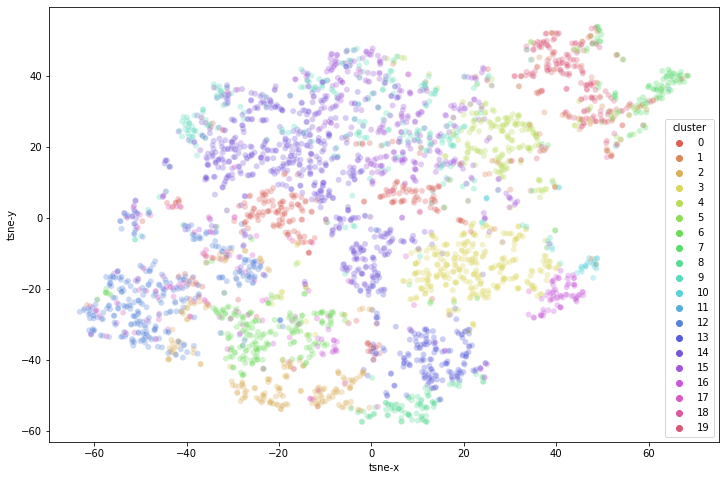

In [214]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='tsne-x', 
                y='tsne-y', 
                hue='cluster', 
                palette=sns.color_palette('hls', 20),
                data=music_data_all4,
                legend='full',
                alpha=0.3
               )
plt.show();

In [211]:
music_data_all5 = music_data_all.drop('duration_ms', axis=1)
tsne = TSNE(n_components=3, verbose=1, perplexity=20, n_iter=600)
tsne_results = tsne.fit_transform(music_data_all5[music_data_all5.columns].values)
tsne_results

C:\Users\Privat\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Privat\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 3383 samples in 0.010s...
[t-SNE] Computed neighbors for 3383 samples in 0.234s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3383
[t-SNE] Computed conditional probabilities for sample 2000 / 3383
[t-SNE] Computed conditional probabilities for sample 3000 / 3383
[t-SNE] Computed conditional probabilities for sample 3383 / 3383
[t-SNE] Mean sigma: 0.413409
[t-SNE] KL divergence after 250 iterations with early exaggeration: 79.148277
[t-SNE] KL divergence after 600 iterations: 1.233689


array([[ -4.48126  ,  -8.139693 ,  16.961325 ],
       [ -3.0814755, -14.645129 , -13.496796 ],
       [ 10.413673 ,  -1.9899646,   9.28644  ],
       ...,
       [ 24.25686  ,   3.8433712,  13.84565  ],
       [ 23.424145 ,   1.9268708,   9.097547 ],
       [ 20.286339 ,   5.1408925,   4.058137 ]], dtype=float32)

In [212]:
music_data_all5['tsne-x'] = tsne_results[:,0]
music_data_all5['tsne-y'] = tsne_results[:,1]
music_data_all5['tsne-z'] = tsne_results[:,2]
music_data_all5['cluster'] = kmns.labels_
music_data_all5

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,tsne-x,tsne-y,tsne-z,cluster
Saudade De Bahia,1.955204,0.938824,2.103635,0.589940,0.368571,0.000003,0.735901,1.422998,3.208596,-4.481260,-8.139693,16.961325,15
"Canta Canta, Minha Gente",2.242424,1.717647,1.837811,5.916454,0.769414,0.000101,0.852820,1.858316,2.404362,-3.081475,-14.645129,-13.496796,8
Mulher Eu Sei,1.857708,0.118118,3.013391,0.803069,1.492968,0.000064,2.654746,1.075975,2.740621,10.413673,-1.989965,9.286440,10
Rosa Morena,1.715415,0.280000,3.294852,0.647911,1.555812,0.000545,0.715268,0.825462,3.103439,9.524154,1.242559,11.621830,4
Desafinado,1.227931,0.343529,2.911087,1.106564,1.581289,0.244834,0.735901,0.868583,3.666538,8.893359,3.064129,12.265297,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",0.532279,0.163294,3.890876,0.806479,1.557511,1.136727,0.572215,0.134497,2.255735,21.902287,2.237769,4.598215,5
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",0.495389,0.237647,3.638526,0.753623,1.452205,0.677267,0.477304,0.072895,2.133282,22.254871,0.863163,3.826381,5
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",0.157049,0.002188,7.146137,0.739983,1.615259,1.540544,0.530949,0.070637,1.836618,24.256861,3.843371,13.845650,7
"Serenade For Strings In E, Op.22, B. 52: 1. Moderato",0.350461,0.048941,4.897779,0.714408,1.499762,0.802863,0.763411,0.121355,1.722068,23.424145,1.926871,9.097547,7


C:\Users\Privat\AppData\Local\Temp\ipykernel_25372\345232854.py:1: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.figure(figsize=(16,10)).gca(projection='3d')


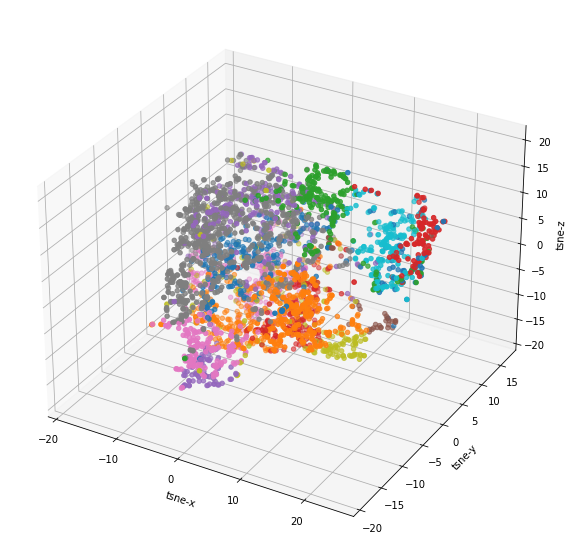

In [213]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(xs="tsne-x", 
           ys="tsne-y", 
           zs="tsne-z", 
           c='cluster', 
           cmap='tab10',
           data=music_data_all5
          )

ax.set_xlabel('tsne-x')
ax.set_ylabel('tsne-y')
ax.set_zlabel('tsne-z')
plt.show();